# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Import statistics Library
import statistics as st

# Split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model using statsmodels
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [ ]:
# Let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/Curso_DA/used_device_data.csv')

## Data Overview

In [ ]:
# Let's take a glimpse of the data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# Checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 3454 rows and 15 columns.


In [ ]:
#Let's check for the type of data and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 9 numerical columns, and 4 object type columns in the data.
* We observe that some columns have less entries that other columns (less than 3454 rows) which indicates the presence of missing values in the data.

In [ ]:
# Let's count our missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in 5 columns of the data.

In [ ]:
# Let's check for duplicates in the data
data.duplicated().sum()

0



*   There are none duplicates in the data.



In [ ]:
# Checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433




*   `screen_size:` On average screen size is around 14 cm. 75% of devices have less than or equal to 15.34 cm screen size. There is a big difference between the maximum value and the 75% percentile of the data which hints the presence of outliers in this column.
*   `main_camera_mp:` 75% of devices have a main camera with less than or equal to 13 mp. The maximum value is very high, wich hints the presence of outliers. 
*   `selfie_camera_mp:` 75% of devices have a main camera with less than or equal to 8 mp. There are also outliers in this column.
*   `int_memory:` 75% of devices have less than or equal to 64 GB of memory. Big presence of outliers.
*   `ram:` Distribution of RAM is the same for the 25%, 50% or 75% of the data: 4 GB. The maximum value jumps to 12 GB, wich hints outliers.
*   `battery:`  Maximum value hints the presence of outliers in the data. Median is 3000 mAh 
*   `weight:` The median weight is 160 g. Maximum value hints the presence of outliers in the data: 855 g. 
*   `release_year:` Devices release year ranges from 2013 to 2020. 
*   `days_used:` Minimum value hints the presence of outliers in this column. 
*   `normalized_used_price:` Average normalized price for refurbished devices is 4.36 EUR. 
*   `normalized_new_price:` Average normalized price for new devices is 5.23 EUR. 
*   Missing values are present in columns with continous data and outliers. Median is the best approach to impute these values.



In [ ]:
# Making a list of all categorical variables
cat_cols =  ['brand_name', 'os', '4g', '5g']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
--------------------------------------------------
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
--------------------------------------------------
yes    2335
no     1119
Name: 4g, dtype: int64
--------------------------------------------------
no     3302
yes     152
Name: 5g, dtype: int64
-----------------------

In [ ]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874
Vivo          0.033874
Honor         0.033584
HTC           0.031847
Nokia         0.030689
Motorola      0.030689
Sony          0.024899
Meizu         0.017950
Gionee        0.016213
Acer          0.014765
XOLO          0.014186
Panasonic     0.013607
Realme        0.011870
Apple         0.011291
Lava          0.010423
Celkon        0.009554
Spice         0.008686
Karbonn       0.008396
Coolpad       0.006369
BlackBerry    0.006369
Microsoft     0.006369
OnePlus       0.006369
Google        0.004343
Infinix       0.002895
Name: brand_name, dtype: float64
--------------------------------------------------
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64
-----------------------------



*   Samsung is the most common brand name (9.87%), not accounting for 'Others.'
*   Huawei (7.26%), LG (5.81%), Lenovo (4.95%), and ZTE (4.05%) complete the top 5 list. 



## Exploratory Data Analysis (EDA)

### Univariate analysis

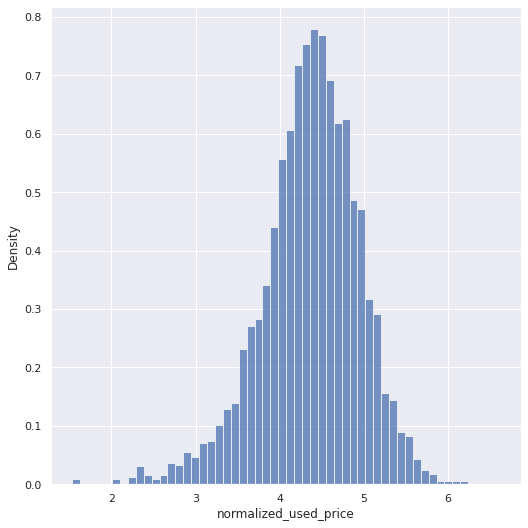

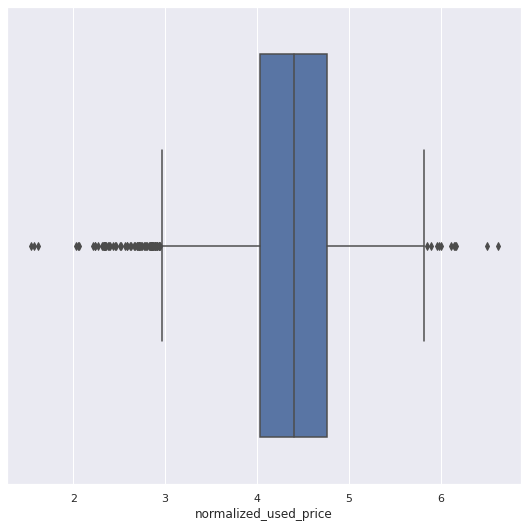

In [ ]:
#Observations on price
sns.histplot(data=data,x='normalized_used_price',stat='density')
plt.show()
sns.boxplot(data=data,x='normalized_used_price')
plt.show()

*   Normalized used price follows a normal distribution.
*   We see outliers in the data. 

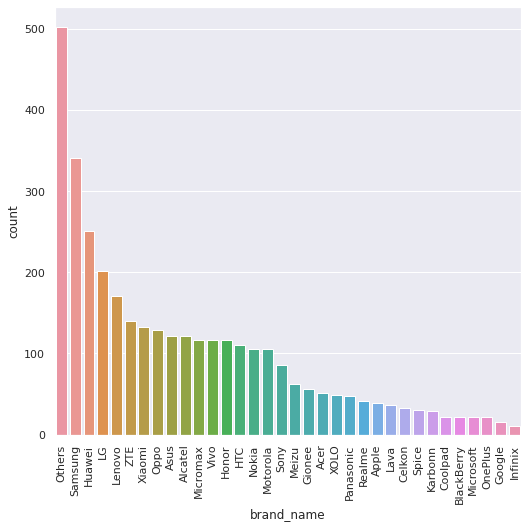

In [ ]:
#Observations on brand name
sns.countplot(data=data,x='brand_name', order = data['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


*   As mentioned before, Samsung, Huawei, LG, Lenovo, and ZTE are the top 5 brands present in the dataset.



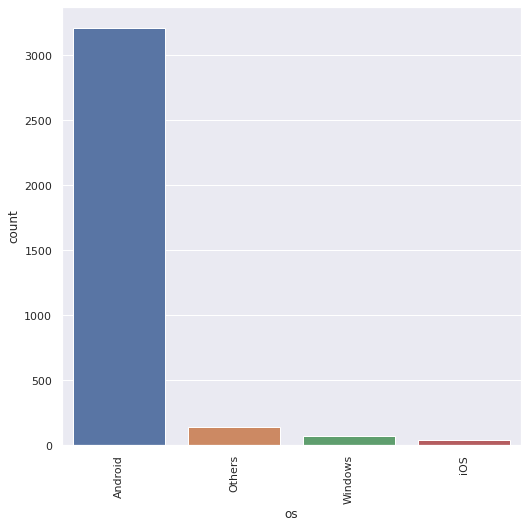

In [ ]:
#Plotting proportions in OS
sns.countplot(data=data,x='os', order = data['os'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Getting the percentages
data['os'].value_counts(normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

*   From the visualization, it is obvious Android is the dominant OS in the dataset.
*   It runs in 93.05% of devices. 



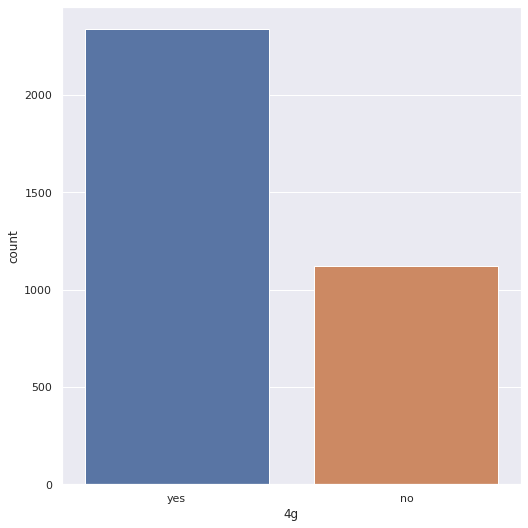

In [ ]:
#Plotting proportions in 4G
sns.countplot(data=data,x='4g')
plt.show()

*   The number of devices with 4G approximately doubles those with no 4G.



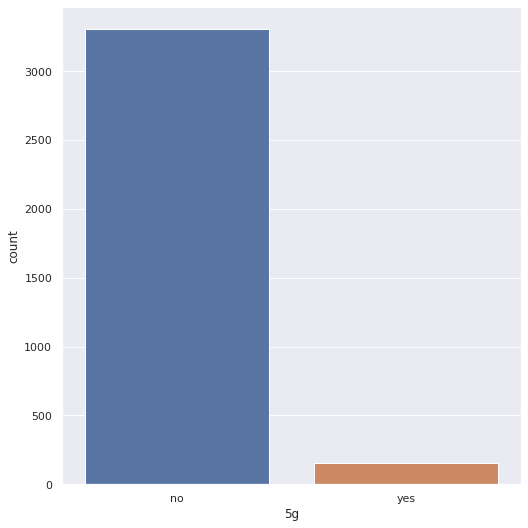

In [ ]:
#Plotting proportions in 5G.
sns.countplot(data=data,x='5g')
plt.show()


*   Devices with 5G available are a slim minority.




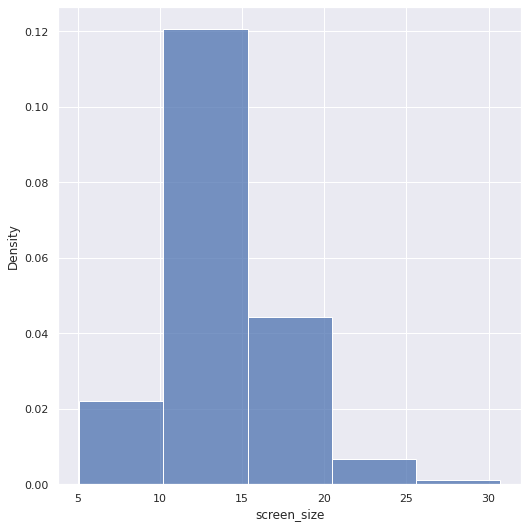

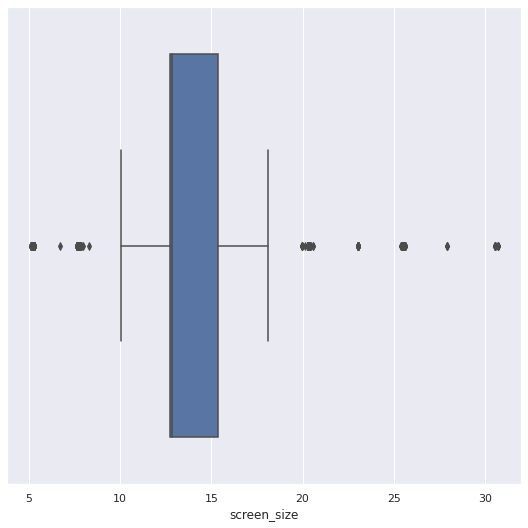

In [ ]:
#Plotting screen size
sns.histplot(data=data,x='screen_size',stat='density', bins = 5)
plt.show()
sns.boxplot(data=data,x='screen_size')
plt.show()

*   Distribution in the column is somewhat normal.
*   There are lots of outliers.



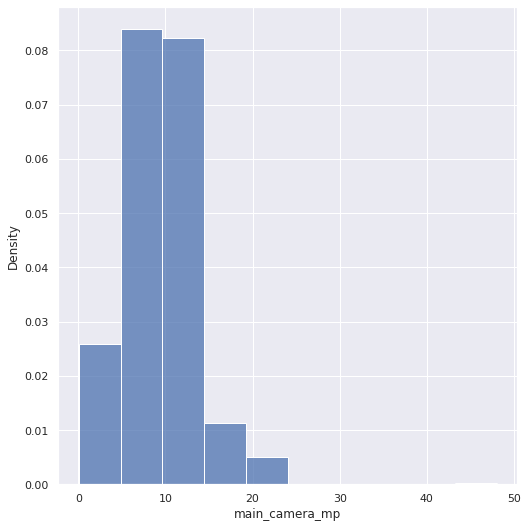

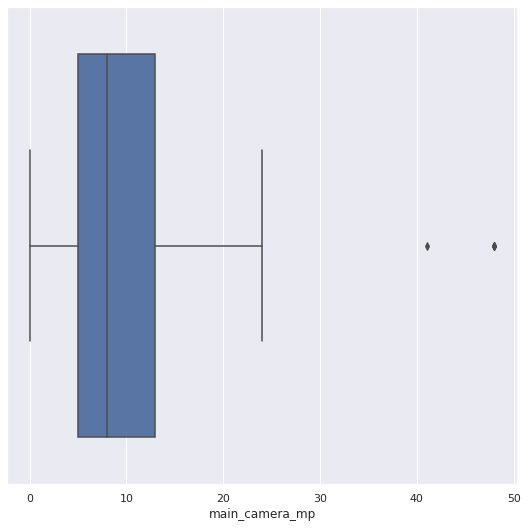

In [ ]:
#Plotting main camera mp
sns.histplot(data=data,x='main_camera_mp',stat='density', bins = 10)
plt.show()
sns.boxplot(data=data,x='main_camera_mp')
plt.show()

*   The distribution for main camera mp is right skewed.



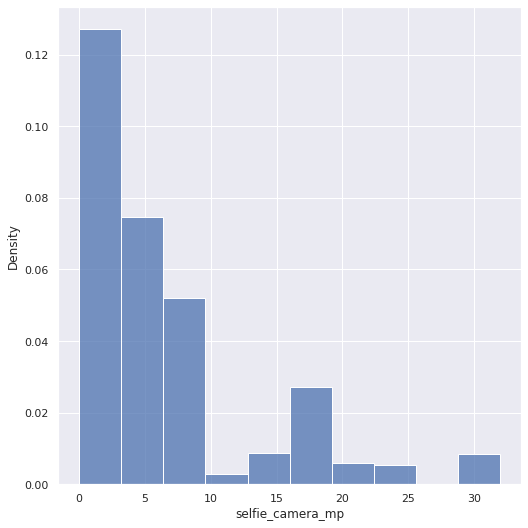

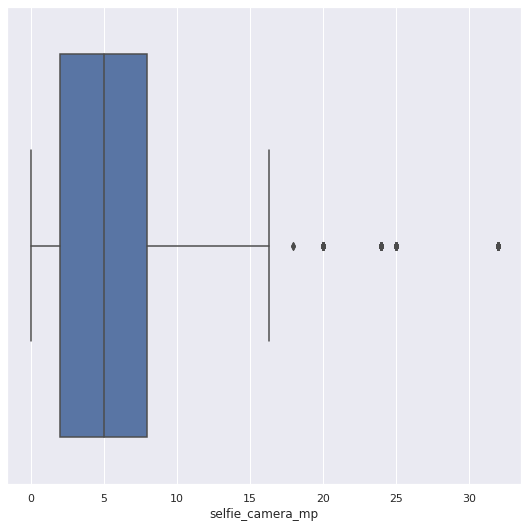

In [ ]:
#Plotting selfie camera mp
sns.histplot(data=data,x='selfie_camera_mp',stat='density', bins = 10)
plt.show()
sns.boxplot(data=data,x='selfie_camera_mp')
plt.show()



*   The distribution for main camera mp is also right skewed.



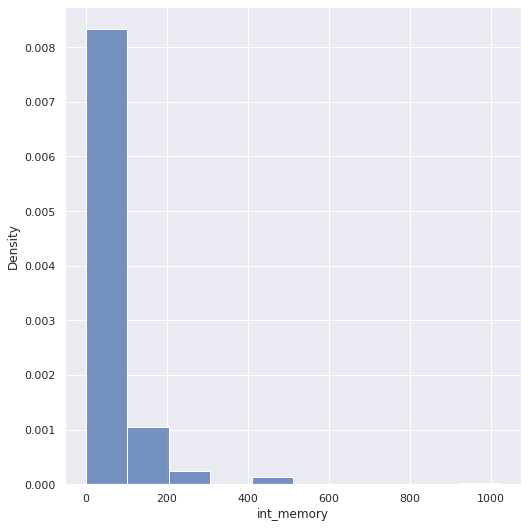

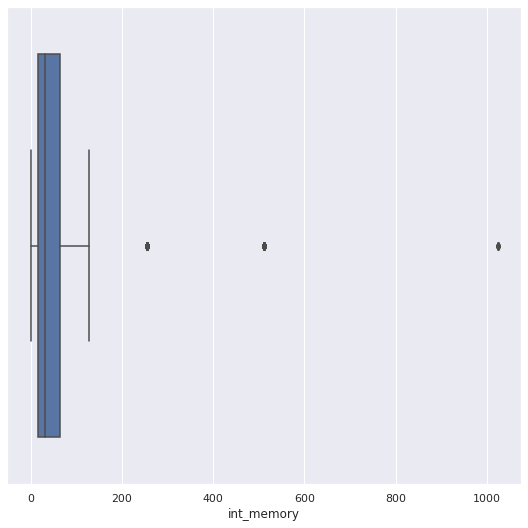

In [ ]:
#Plotting internal memory
sns.histplot(data=data,x='int_memory',stat='density', bins = 10)
plt.show()
sns.boxplot(data=data,x='int_memory')
plt.show()



*   Internal memory is heavily skewed.
*   Some outliers are way too far from the median.



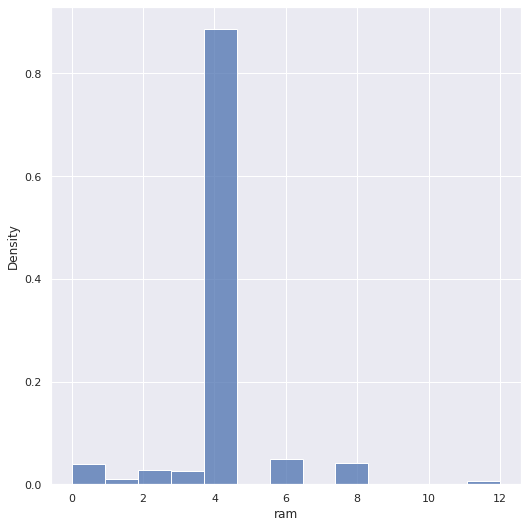

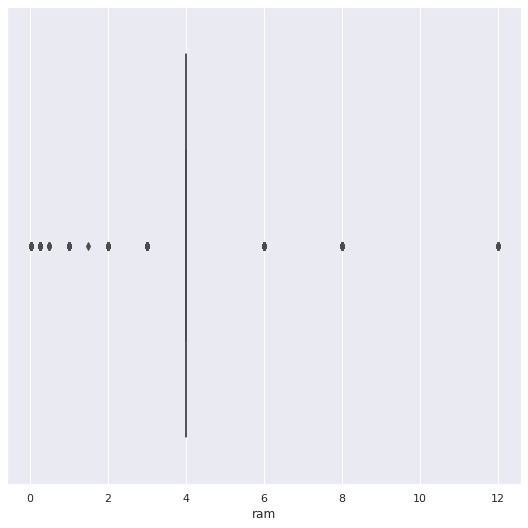

In [ ]:
#Plotting RAM
sns.histplot(data=data,x='ram',stat='density')
plt.show()
sns.boxplot(data=data,x='ram')
plt.show()

*   All devices, except for outliers, have 4GB of RAM.



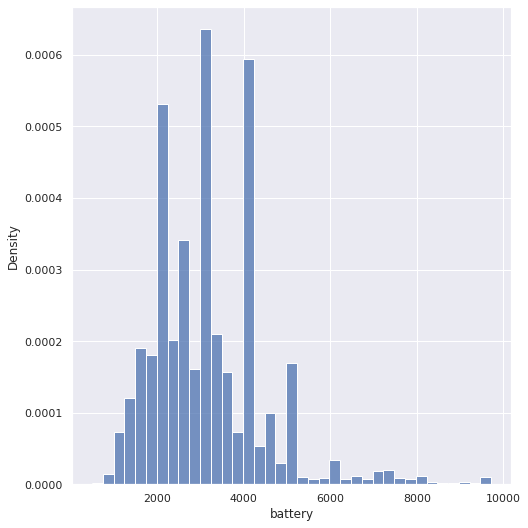

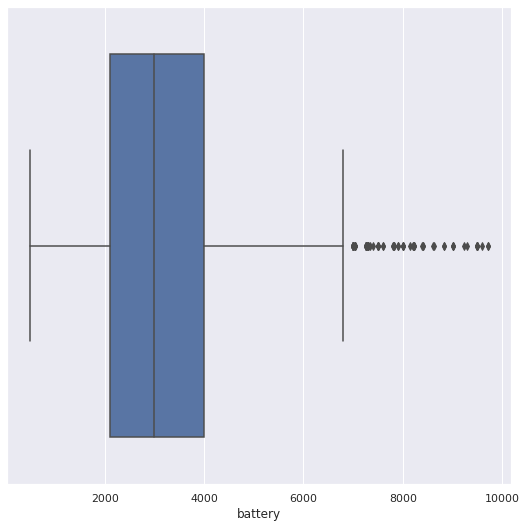

In [ ]:
#Plotting battery
sns.histplot(data=data,x='battery',stat='density')
plt.show()
sns.boxplot(data=data,x='battery')
plt.show()



*   The dat in the battery column is right-skewed.
*   50% of devices have between 2000 and 4000 mAh.



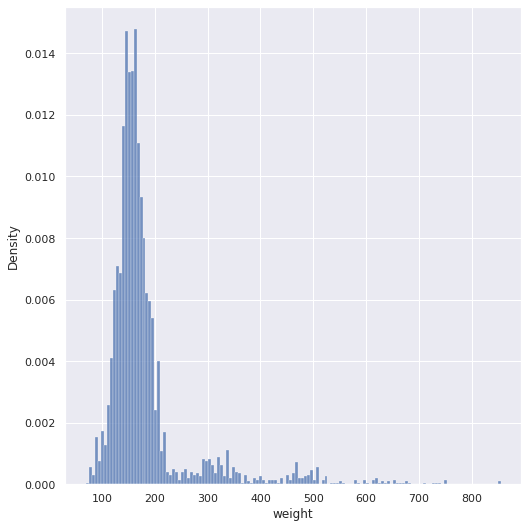

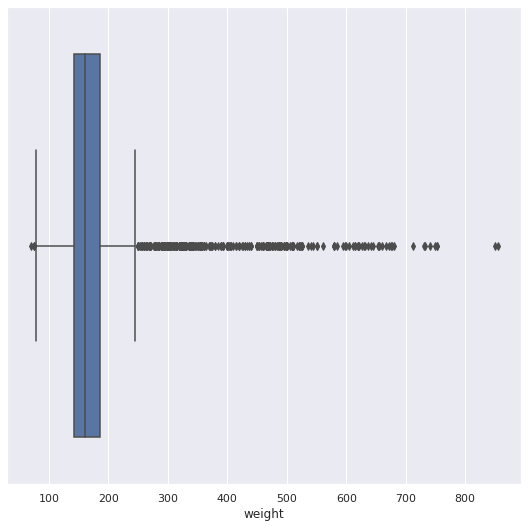

In [ ]:
#Plotting weight
sns.histplot(data=data,x='weight',stat='density')
plt.show()
sns.boxplot(data=data,x='weight')
plt.show()

*   Weight variable is also very right skewed, with lots of outliers.



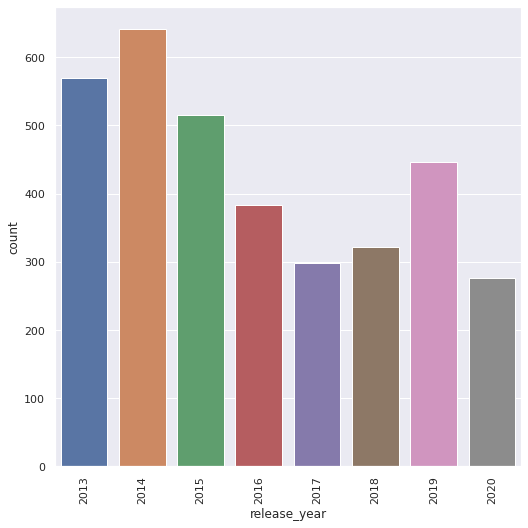

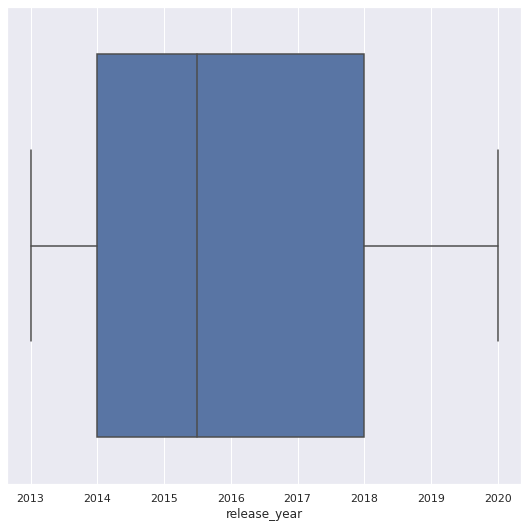

In [ ]:
#Plotting release year
sns.countplot(data=data,x='release_year')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,x='release_year')
plt.show()

*   A slight majority of devices in the dataset were released in 2015 or earlier, although 2019 shows a spike among newer models. 



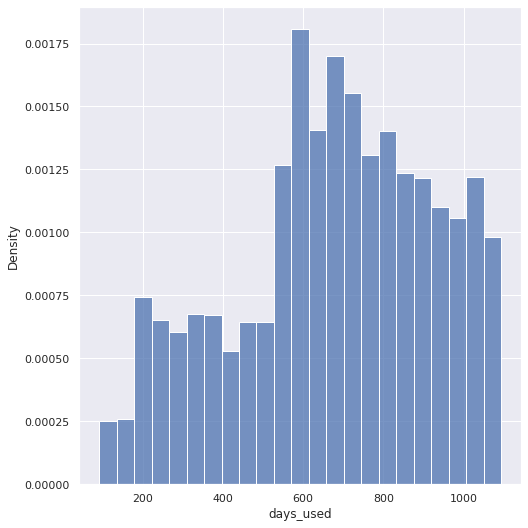

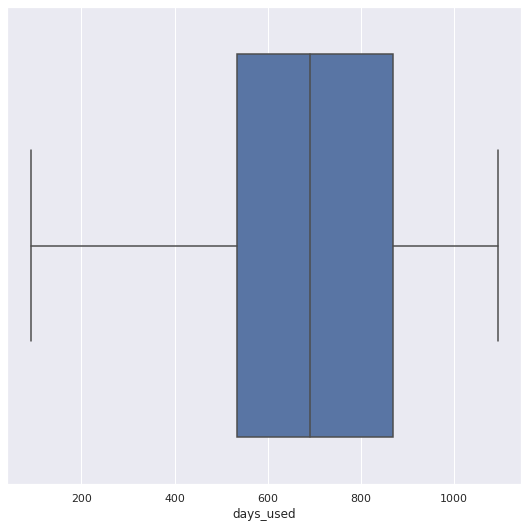

In [ ]:
#Plotting days used
sns.histplot(data=data,x='days_used',stat='density')
plt.show()
sns.boxplot(data=data,x='days_used')
plt.show()

*   Data in the column days_used is left skewed.



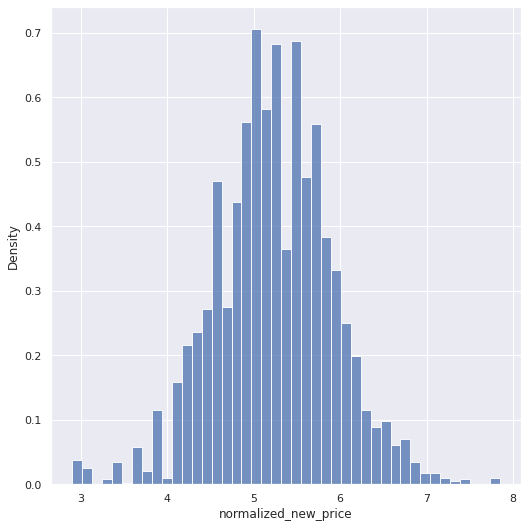

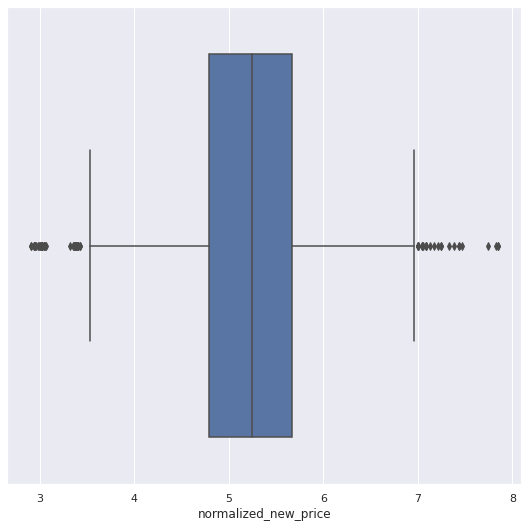

In [ ]:
#Plotting normalized new price
sns.histplot(data=data,x='normalized_new_price',stat='density')
plt.show()
sns.boxplot(data=data,x='normalized_new_price')
plt.show()

*   The data in normalized used price variable follows a distribution very close to normal. 



### Multivariate analysis

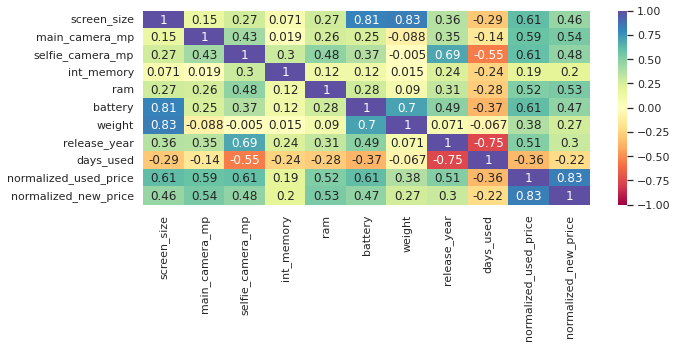

In [ ]:
#Plotting correlations between numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

*   We can see a high correlation between screen size and battery and weight variables.
*   High correlation between used price and new price. 
*   High correlation between weight and battery
*   High negative correlation between release year and days used (which is expected).
*   Normalized used price is highly correlated with the normalized new price. 
*   Normalized used price is also correlated (more than 0.5) with screen size, main camera MP, selfie camera MP, RAM, battery, and release year.

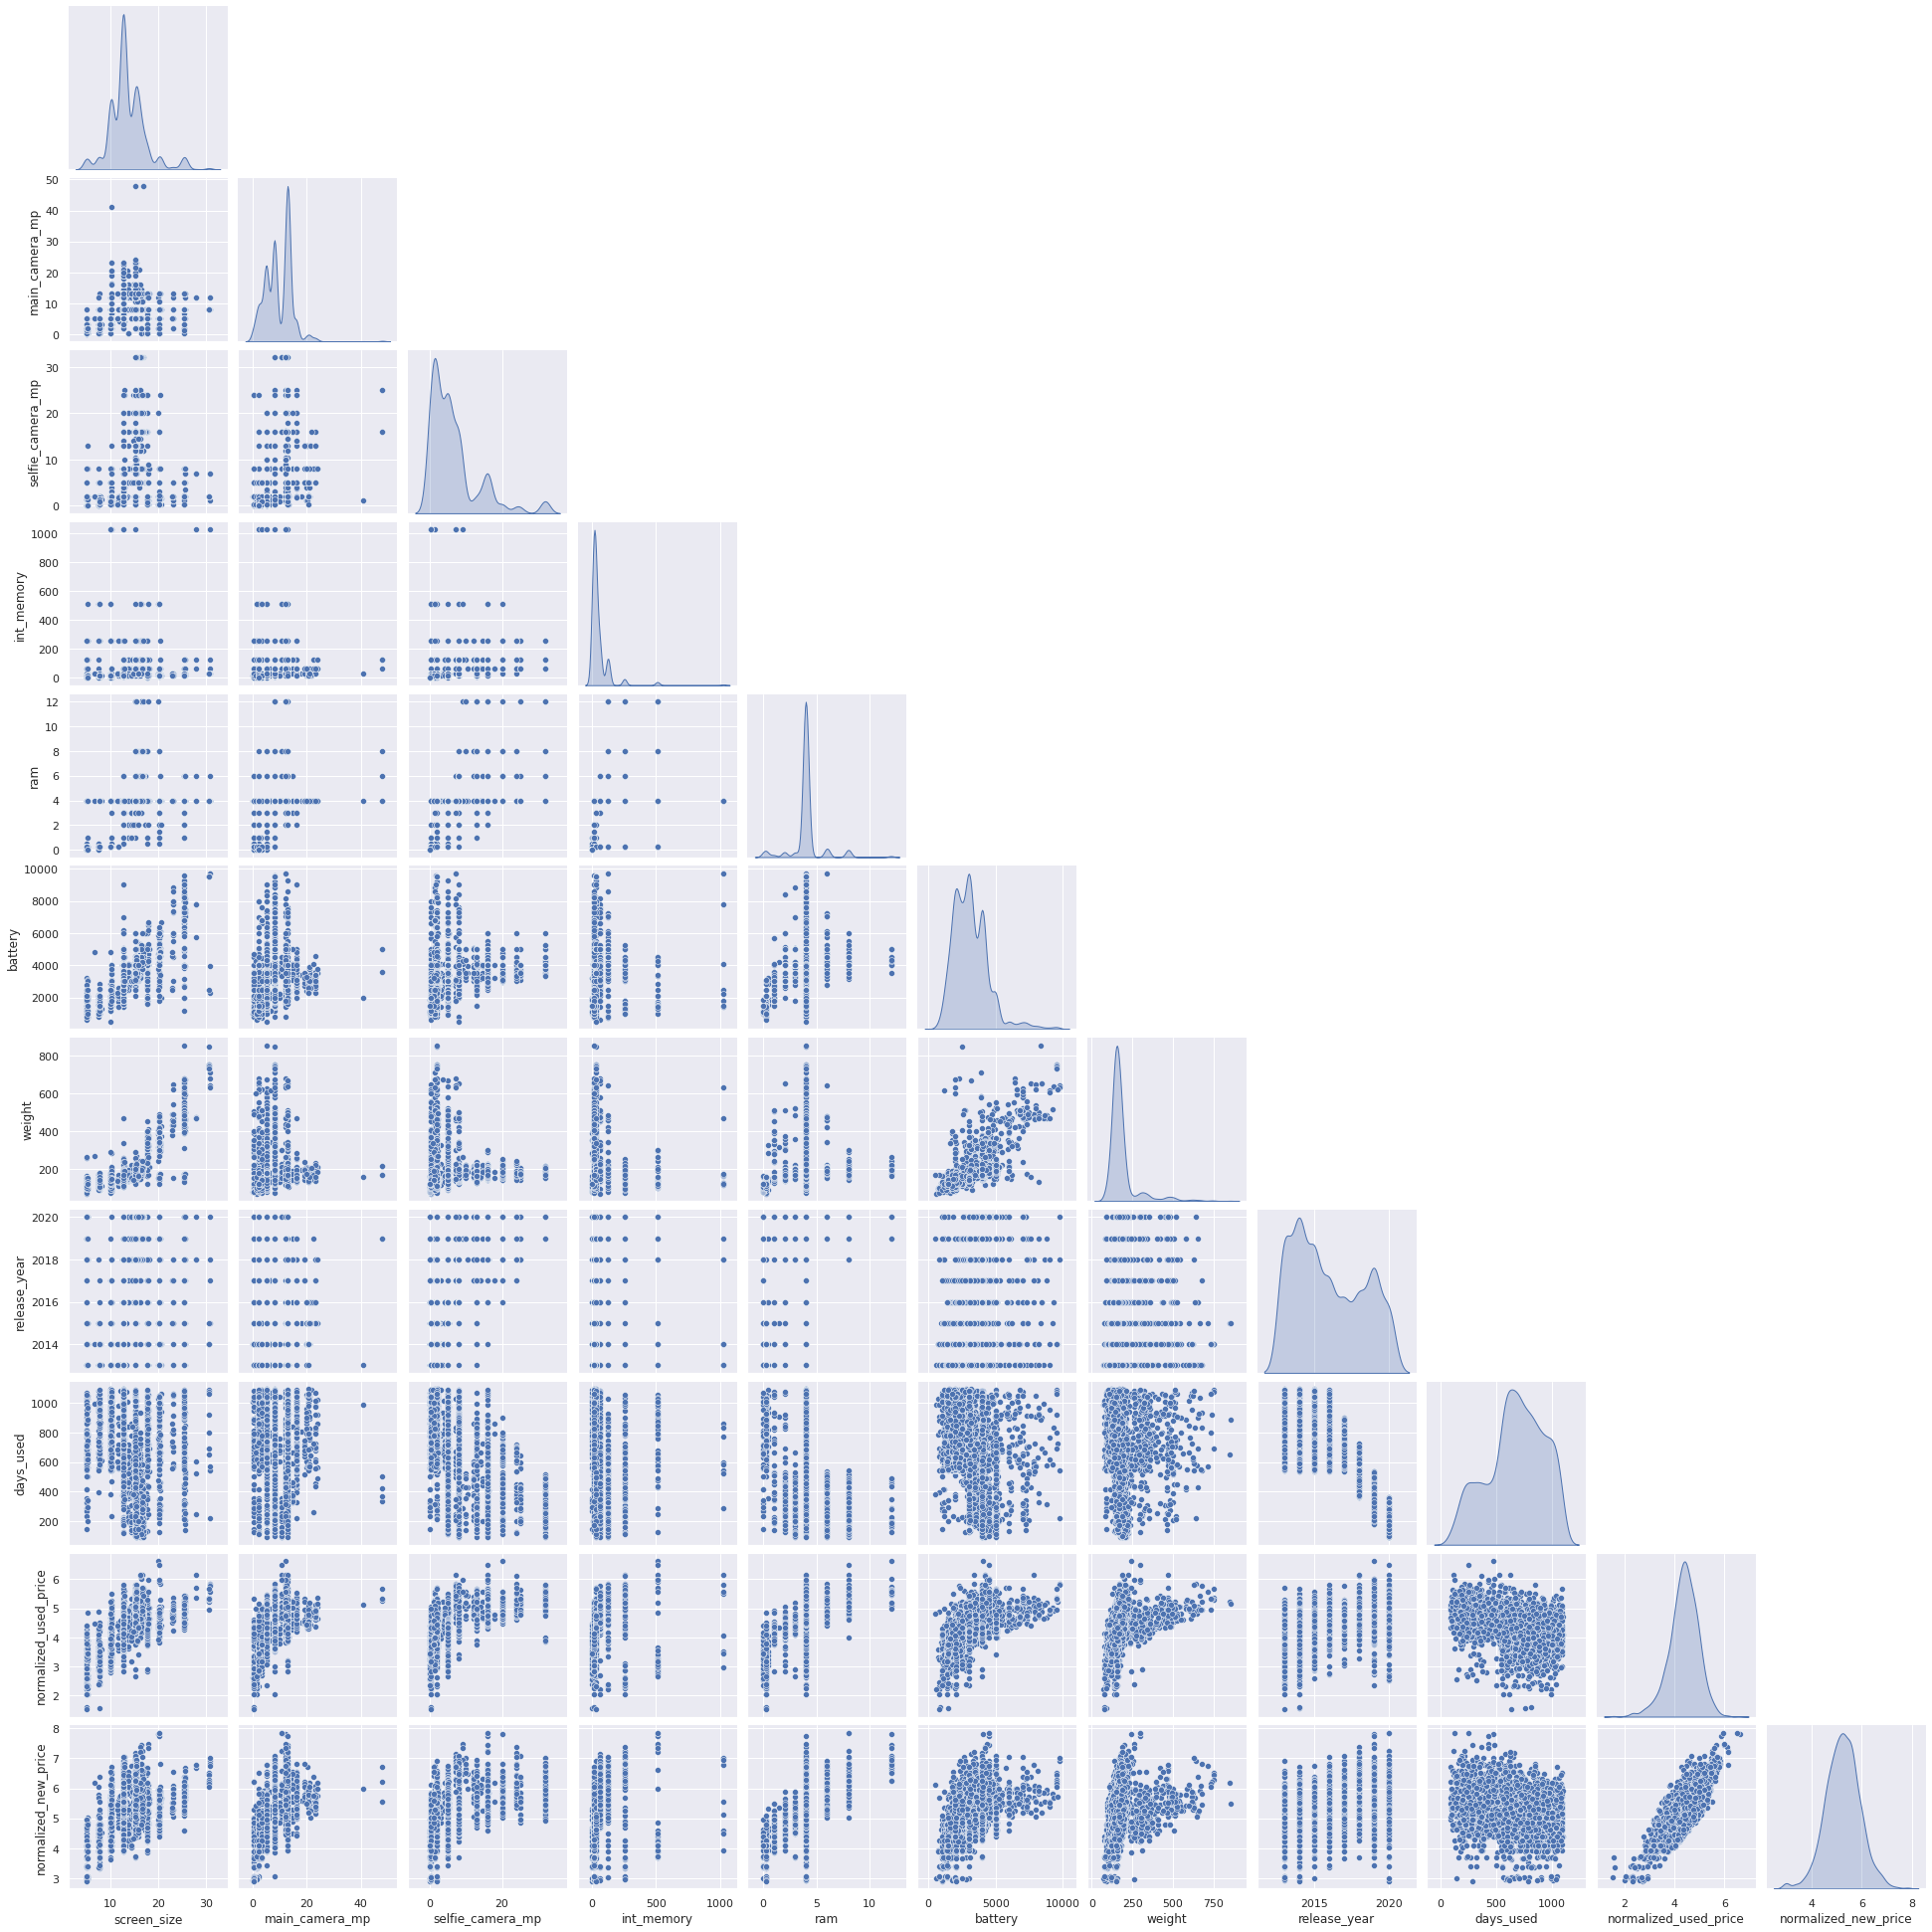

In [ ]:
#Plotting all the correlations in numerical variables
data_attr = data.iloc[:, 0:15]
sns.pairplot(
    data_attr, diag_kind="kde", corner = True
)

*   We see a positive linear correlation between normalized used and new prices. 
*   We also see a somewhat positive linear correlation between normalized used price and screen size, main camera and selfie camera mp, RAM, battery, and weight.


In [ ]:
#Let's create a variable for numeric columns
num_cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_new_price']

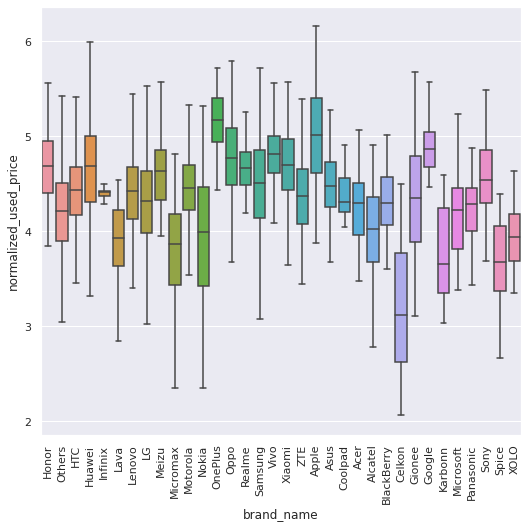

In [ ]:
#Let's see prices distributions for the different brands in the dataset
sns.boxplot(data=data,x='brand_name',y='normalized_used_price',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
plt.xticks(rotation=90)
plt.show()

*   Apple is the brand with the highest normalized used prices and Celkon with the lowest. 
*   Nokia and Samsung seem to have the widest variety in normalized used prices. 



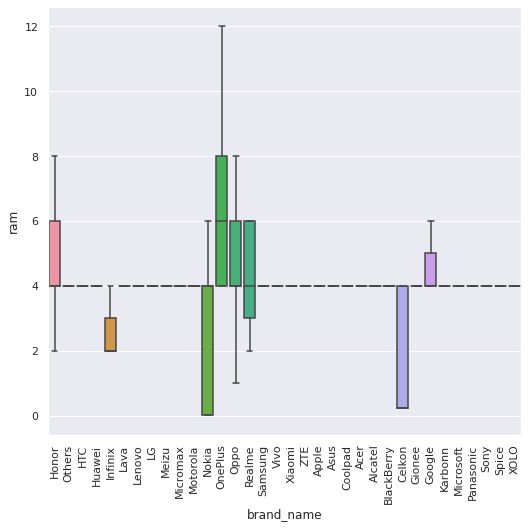

In [ ]:
#Let's see RAM ranges by brand.
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(data=data,x='brand_name',y='ram',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
plt.xticks(rotation=90)
plt.show()

*   Most brands have 4 GB of RAM.
*   One Plus has the more comprehensive offer in RAM, from 4 to 12, followed by Oppo, from 1 to 8. 




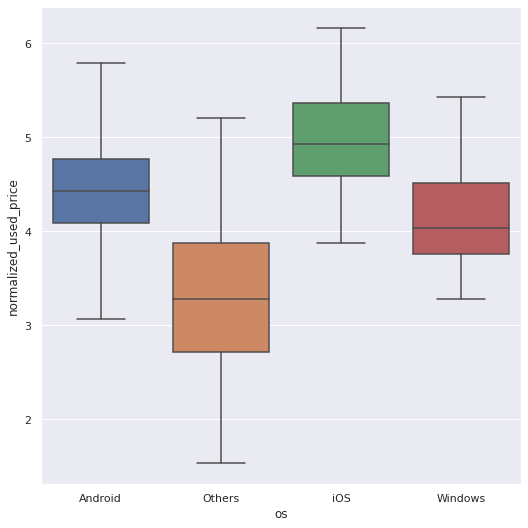

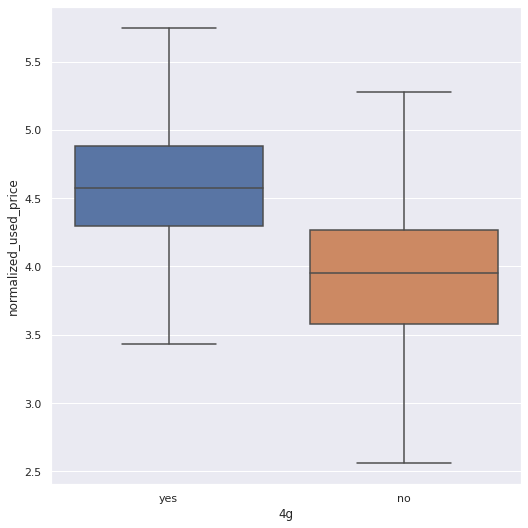

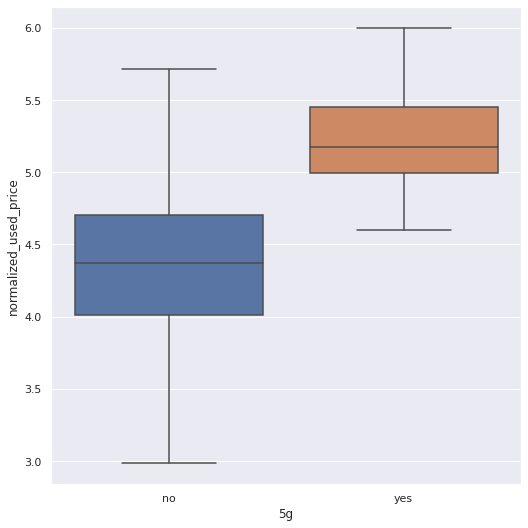

In [ ]:
#Let's how price ranges with other categorical variables
for col2 in cat_cols:
  if col2 == 'brand_name': continue
  sns.boxplot(data=data,x=col2,y='normalized_used_price',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
  plt.show()

*   Android, iOS, and Windows have relatively similar price ranges.
*   Others have a wider range, with less high prices. 
*   As expected, devices with 4G and 5G availability are more expensive than devices without 4G and 5G availability.



In [ ]:
#creating a data subset for devices with batteries of 4500 mAh or more
bat_p4500 = data[data.loc[:,'battery'] >= 4500]

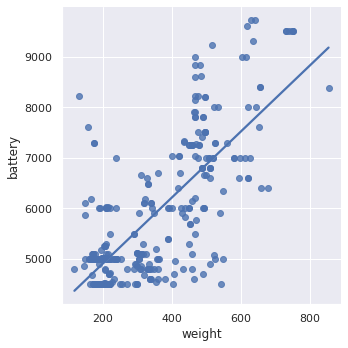

In [ ]:
#plotting the relationship between weight and battery for devices with 4500 mAh batteries or more
sns.lmplot(data=bat_p4500, x='weight', y= 'battery', ci=False)

*   There seems to be a positive correlation between battery capacity and weight. 




In [ ]:
#Creating a subset for bigger screen devices
screen_p6 = data[data.loc[:,'screen_size'] >= 15.24]

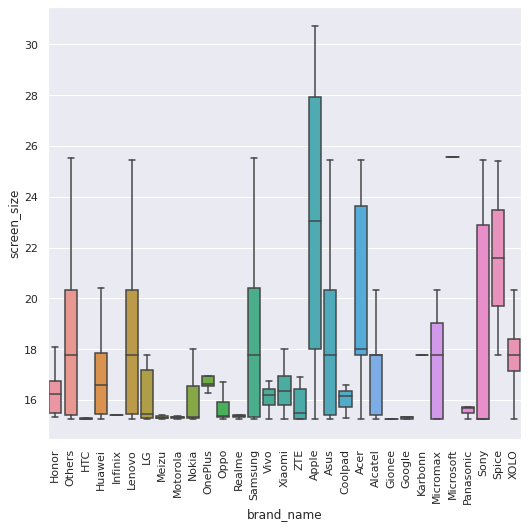

In [ ]:
#Plotting the relationship between bigger screen devices and brand
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(data=screen_p6,x='brand_name',y='screen_size',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
plt.xticks(rotation=90)
plt.show()

*   Apple has a wider range of sizes among 6-inch plus screen devices and the biggest also (12 inches, 30.48 cm).
*   Lenovo, Samsung, Acer, Sony, and Spice have similar distribution among big screen sizes, all with 10 inches top devices (25.4 cm).

In [ ]:
#Creating a data subset for devices with more powerful selfie cameras
selfie_p8 = data[data.loc[:,'selfie_camera_mp'] >= 8]

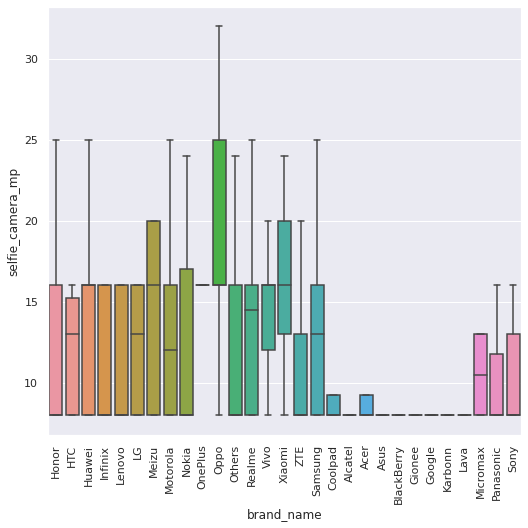

In [ ]:
#Sorting the devices with more powerful selfie cameras by brand 
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(data=selfie_p8 ,x='brand_name',y='selfie_camera_mp',showfliers=False)
plt.xticks(rotation=90)
plt.show()

*   Oppo has the broadest range of devices with more than 8 MP selfie cameras. It also has devices with more MP in selfie cameras: 32 MP
*   Honor, Huawei, Meizu, Nokia, Realme, Xiaomi, and Samsung have devices with a similar range of MP for selfie cameras of more than 8 MP.



### EDA observations

**1. What does the distribution of normalized used device prices look like?**

Normalized used price seems to follow a normal distribution.


**2. What percentage of the used device market is dominated by Android devices?**

Android runs in 93.05% of devices.


**3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

Most brands have 4 GB of RAM. One Plus has a wider offer in RAM, from 4 to 12, followed by Oppo, from 1 to 8.


**4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

Devices with batteries with more than 4500 mAh show a positive linear correlation with weight, i.e., the mightier the battery, the heavier the device.   


**5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

Apple has a wider range of sizes among 6-inch-plus screen devices and also has the biggest (12 inches, 30.48 cm).
Lenovo, Samsung, Acer, Sony, and Spice have similar distribution among big screen sizes, all with 10 inches top devices (25.4 cm).


**6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

Oppo has the broadest range of devices with more than 8 MP selfie cameras. It also has devices with more MP in selfie cameras: 32 MP.
Honor, Huawei, Meizu, Nokia, Realme, Xiaomi, and Samsung have devices with similar range of MP for selfie cameras of more than 8 MP.


**7. Which attributes are highly correlated with the normalized price of a used device?**
Normalized used price is highly correlated with normalized new price. Normalized used price is also correlated (more than 0.5) with screen size, main camera MP, selfie camera MP, RAM, battery, and release year.

## Data Preprocessing

### Missing values

In [ ]:
# Let's make a copy of our data for safety sake
data1 = data.copy()

In [ ]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data1.isnull().sum()[data1.isnull().sum()>0],'Percentage':(data1.isnull().sum()[data1.isnull().sum()>0]/data1.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


In [ ]:
imput_cols= ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

In [ ]:
#extracting the information from all columns with missing values to detect patterns
for i in imput_cols:
  print(i)
  print(data1.loc[data1[i].isnull()==True])
  print("-" * 50)

main_camera_mp
     brand_name       os  screen_size   4g  5g  main_camera_mp  \
59      Infinix  Android        17.32  yes  no             NaN   
60      Infinix  Android        15.39  yes  no             NaN   
61      Infinix  Android        15.39  yes  no             NaN   
62      Infinix  Android        15.39  yes  no             NaN   
63      Infinix  Android        15.29  yes  no             NaN   
...         ...      ...          ...  ...  ..             ...   
3411     Realme  Android        15.34  yes  no             NaN   
3412     Realme  Android        15.32  yes  no             NaN   
3413     Realme  Android        15.32  yes  no             NaN   
3448       Asus  Android        16.74  yes  no             NaN   
3449       Asus  Android        15.34  yes  no             NaN   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                 8.0        32.0  2.0   6000.0   209.0          2020   
60                 8.0        64.0  4.0   50

*   We see no pattern of null values for camera variable. 
*   The other null values seem to come from similar name brands.
*   We can not see null values overlapping in several columns.

In [ ]:
# gropuing the median of imputable columns by brand name and year of release
data1.groupby(['brand_name','release_year'])[imput_cols].median()

main_camera_mp  selfie_camera_mp  int_memory  ram  \
brand_name release_year                                                      
Acer       2013                     5.0               0.3        16.0  4.0   
           2014                     5.0               2.0        16.0  4.0   
           2015                     5.0               2.0        32.0  4.0   
           2016                    10.5               3.5        24.0  4.0   
           2018                     5.0               2.0        32.0  4.0   
...                                 ...               ...         ...  ...   
ZTE        2016                    13.0               5.0        32.0  4.0   
           2017                    13.0               8.0        32.0  4.0   
           2018                    14.5               8.0        64.0  4.0   
           2019                    14.5               8.0        32.0  3.0   
           2020                     NaN              12.0       128.0  7.0   

                         battery  weight  
brand_name release_year                   
Acer       2013           2400.0   195.0  
           2014           2700.0   159.5  
           2015           2360.0   145.0  
           2016           3740.0   147.5  
           2018           4500.0   544.3  
...                          ...     ...  
ZTE        2016           3000.0   160.0  
           2017           3100.0   164.0  
           2018           3800.0   172.0  
           2019           3200.0   165.0  
           2020           4800.0   212.5  

[212 rows x 6 columns]

In [ ]:
# imputing missing values in columns with null values that share brand name and release year
for i in imput_cols:
  data1[i] = data1[i].fillna(value = data.groupby(['brand_name','release_year'])[i].transform('median'))

In [ ]:
pd.DataFrame({'Count':data1.isnull().sum()[data1.isnull().sum()>0],'Percentage':(data1.isnull().sum()[data1.isnull().sum()>0]/data1.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
battery,6,0.173712
weight,7,0.202664


*   Many missing values are left, but we no longer have them in ram and internal memory columns. 

In [ ]:
# imputing missing values in columns that share brand name
for i in imput_cols:
  data1[i] = data1[i].fillna(value = data.groupby(['brand_name'])[i].transform('median'))

In [ ]:
pd.DataFrame({'Count':data1.isnull().sum()[data1.isnull().sum()>0],'Percentage':(data1.isnull().sum()[data1.isnull().sum()>0]/data1.shape[0])*100})

,Count,Percentage
main_camera_mp,10,0.289519


We have only 10 null values left. Let's see them. 

In [ ]:
#extracting the information from the 10 rows with missing values to detect patterns
for i in imput_cols:
  print(i)
  print(data1.loc[data1[i].isnull()==True])
  print("-" * 50)

main_camera_mp
    brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android        17.32  yes  no             NaN   
60     Infinix  Android        15.39  yes  no             NaN   
61     Infinix  Android        15.39  yes  no             NaN   
62     Infinix  Android        15.39  yes  no             NaN   
63     Infinix  Android        15.29  yes  no             NaN   
278    Infinix  Android        17.32  yes  no             NaN   
279    Infinix  Android        15.39  yes  no             NaN   
280    Infinix  Android        15.39  yes  no             NaN   
281    Infinix  Android        15.39  yes  no             NaN   
282    Infinix  Android        15.29  yes  no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   

*   All Infinix devices have missing data for main camera. Let's impute this values.


In [ ]:
data1['main_camera_mp'] = data1['main_camera_mp'].fillna(data1['main_camera_mp'].median())

In [ ]:
#extracting the information from all columns with missing values to detect patterns
for i in imput_cols:
  print(i)
  print(data1.loc[data1[i].isnull()==True])
  print("-" * 50)

main_camera_mp
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []
--------------------------------------------------
selfie_camera_mp
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []
--------------------------------------------------
int_memory
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []
--------------------------------------------------
ram
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_

*   All null values have been imputed.

### Feature engeneering

We can create a new and more helpful variable from the year of release variable. To do so, let's extract how old the devices are by substracting the year of release from 2021 (the year of the dataset).

In [ ]:
data1['AgeofDev'] = 2021 - data1['release_year']
data1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,AgeofDev
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1


In [ ]:
#Dropping release year column
data1.drop("release_year", axis=1, inplace=True)
data1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,AgeofDev
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [ ]:
#dropping release year from the numeric columns list
num_cols.append('AgeofDev')
#and adding the age of the device
num_cols.remove('release_year')

*   In 4G and 5G columns, we can replace 'yes' and 'no' values for 1 and 0 for better future processing. 

In [ ]:
# replacing 'converted' values to integers
data1.replace(('yes', 'no'), (1, 0), inplace=True)
data1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,AgeofDev
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Checking for outliers

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data1[num_cols].quantile(0.25)
Q3 = data1[num_cols].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((data1[num_cols] < lower_whisker) | (data1[num_cols] > upper_whisker)).sum()/data1.shape[0]*100

screen_size             13.028373
main_camera_mp           0.144760
selfie_camera_mp         6.398379
int_memory               3.995368
ram                     18.500290
battery                  2.229299
weight                  10.654314
days_used                0.000000
normalized_new_price     1.910828
AgeofDev                 0.000000
dtype: float64

*   The biggest outliers proportion is in ram (18.5%), followed by screen_size (13%), and weight (10.6%).


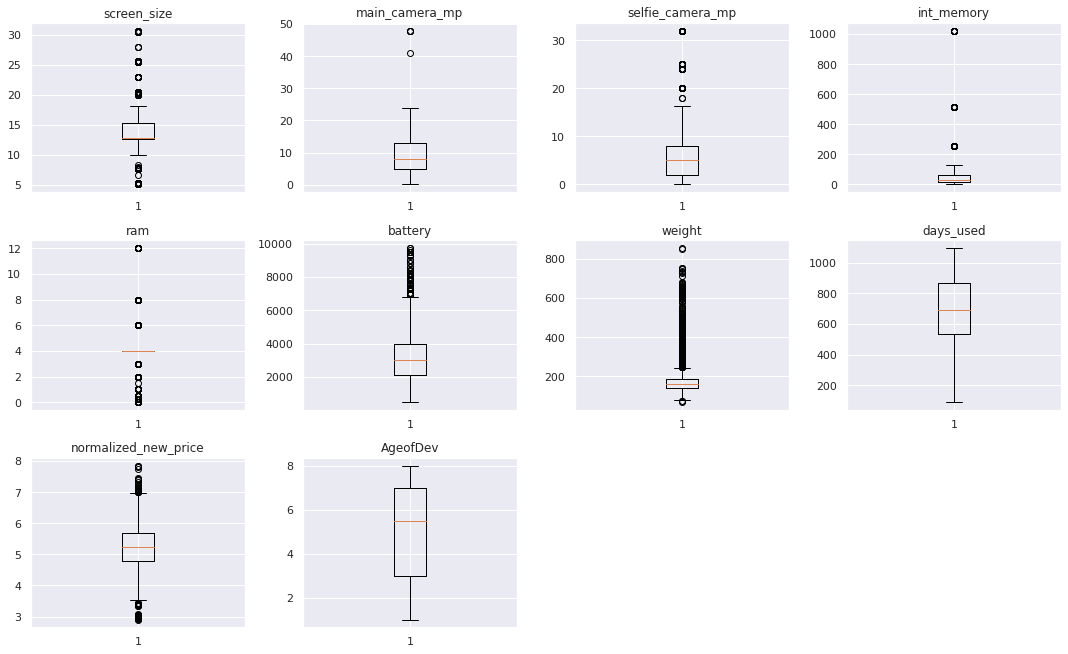

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data1.describe()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,AgeofDev
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,0.676028,0.044007,9.617597,6.555067,54.528474,4.032620,3132.577446,182.636856,674.869716,4.364712,5.233107,5.034742
std,3.805280,0.468057,0.205140,4.749438,6.968440,84.934991,1.368598,1298.884193,88.360445,248.580166,0.588914,0.683637,2.298455
min,5.080000,0.000000,0.000000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,91.000000,1.536867,2.901422,1.000000
25%,12.700000,0.000000,0.000000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,533.500000,4.033931,4.790342,3.000000
50%,12.830000,1.000000,0.000000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,690.500000,4.405133,5.245892,5.500000
75%,15.340000,1.000000,0.000000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,868.750000,4.755700,5.673718,7.000000
max,30.710000,1.000000,1.000000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,1094.000000,6.619433,7.847841,8.000000


In [ ]:
#Getting the max values and median in two variables loaded with outliers
print('The max value in battery is', max(data1['battery']))
print('The median value in battery is', st.median(data1['battery']))
print('The max value in memory is', max(data1['int_memory']))
print('The median value in memory is', st.median(data1['int_memory']))

The max value in battery is 9720.0
The median value in battery is 3000.0
The max value in memory is 1024.0
The median value in memory is 32.0


*   The boxplots show a lot of outliers. After a quick web search, we know the variation shown in each column is in plausible ranges. 
*   For example, the market does have phones with one terabyte of internal memory, even though our median is 32 GB, or with 10.000 mAh batteries, when our median is 3000.  
*   No outlier treatment was suggested for the dataset. 




 


## EDA second round

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   int64  
 4   5g                     3454 non-null   int64  
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  AgeofDev               3454 non-null   int64  
dtypes: f

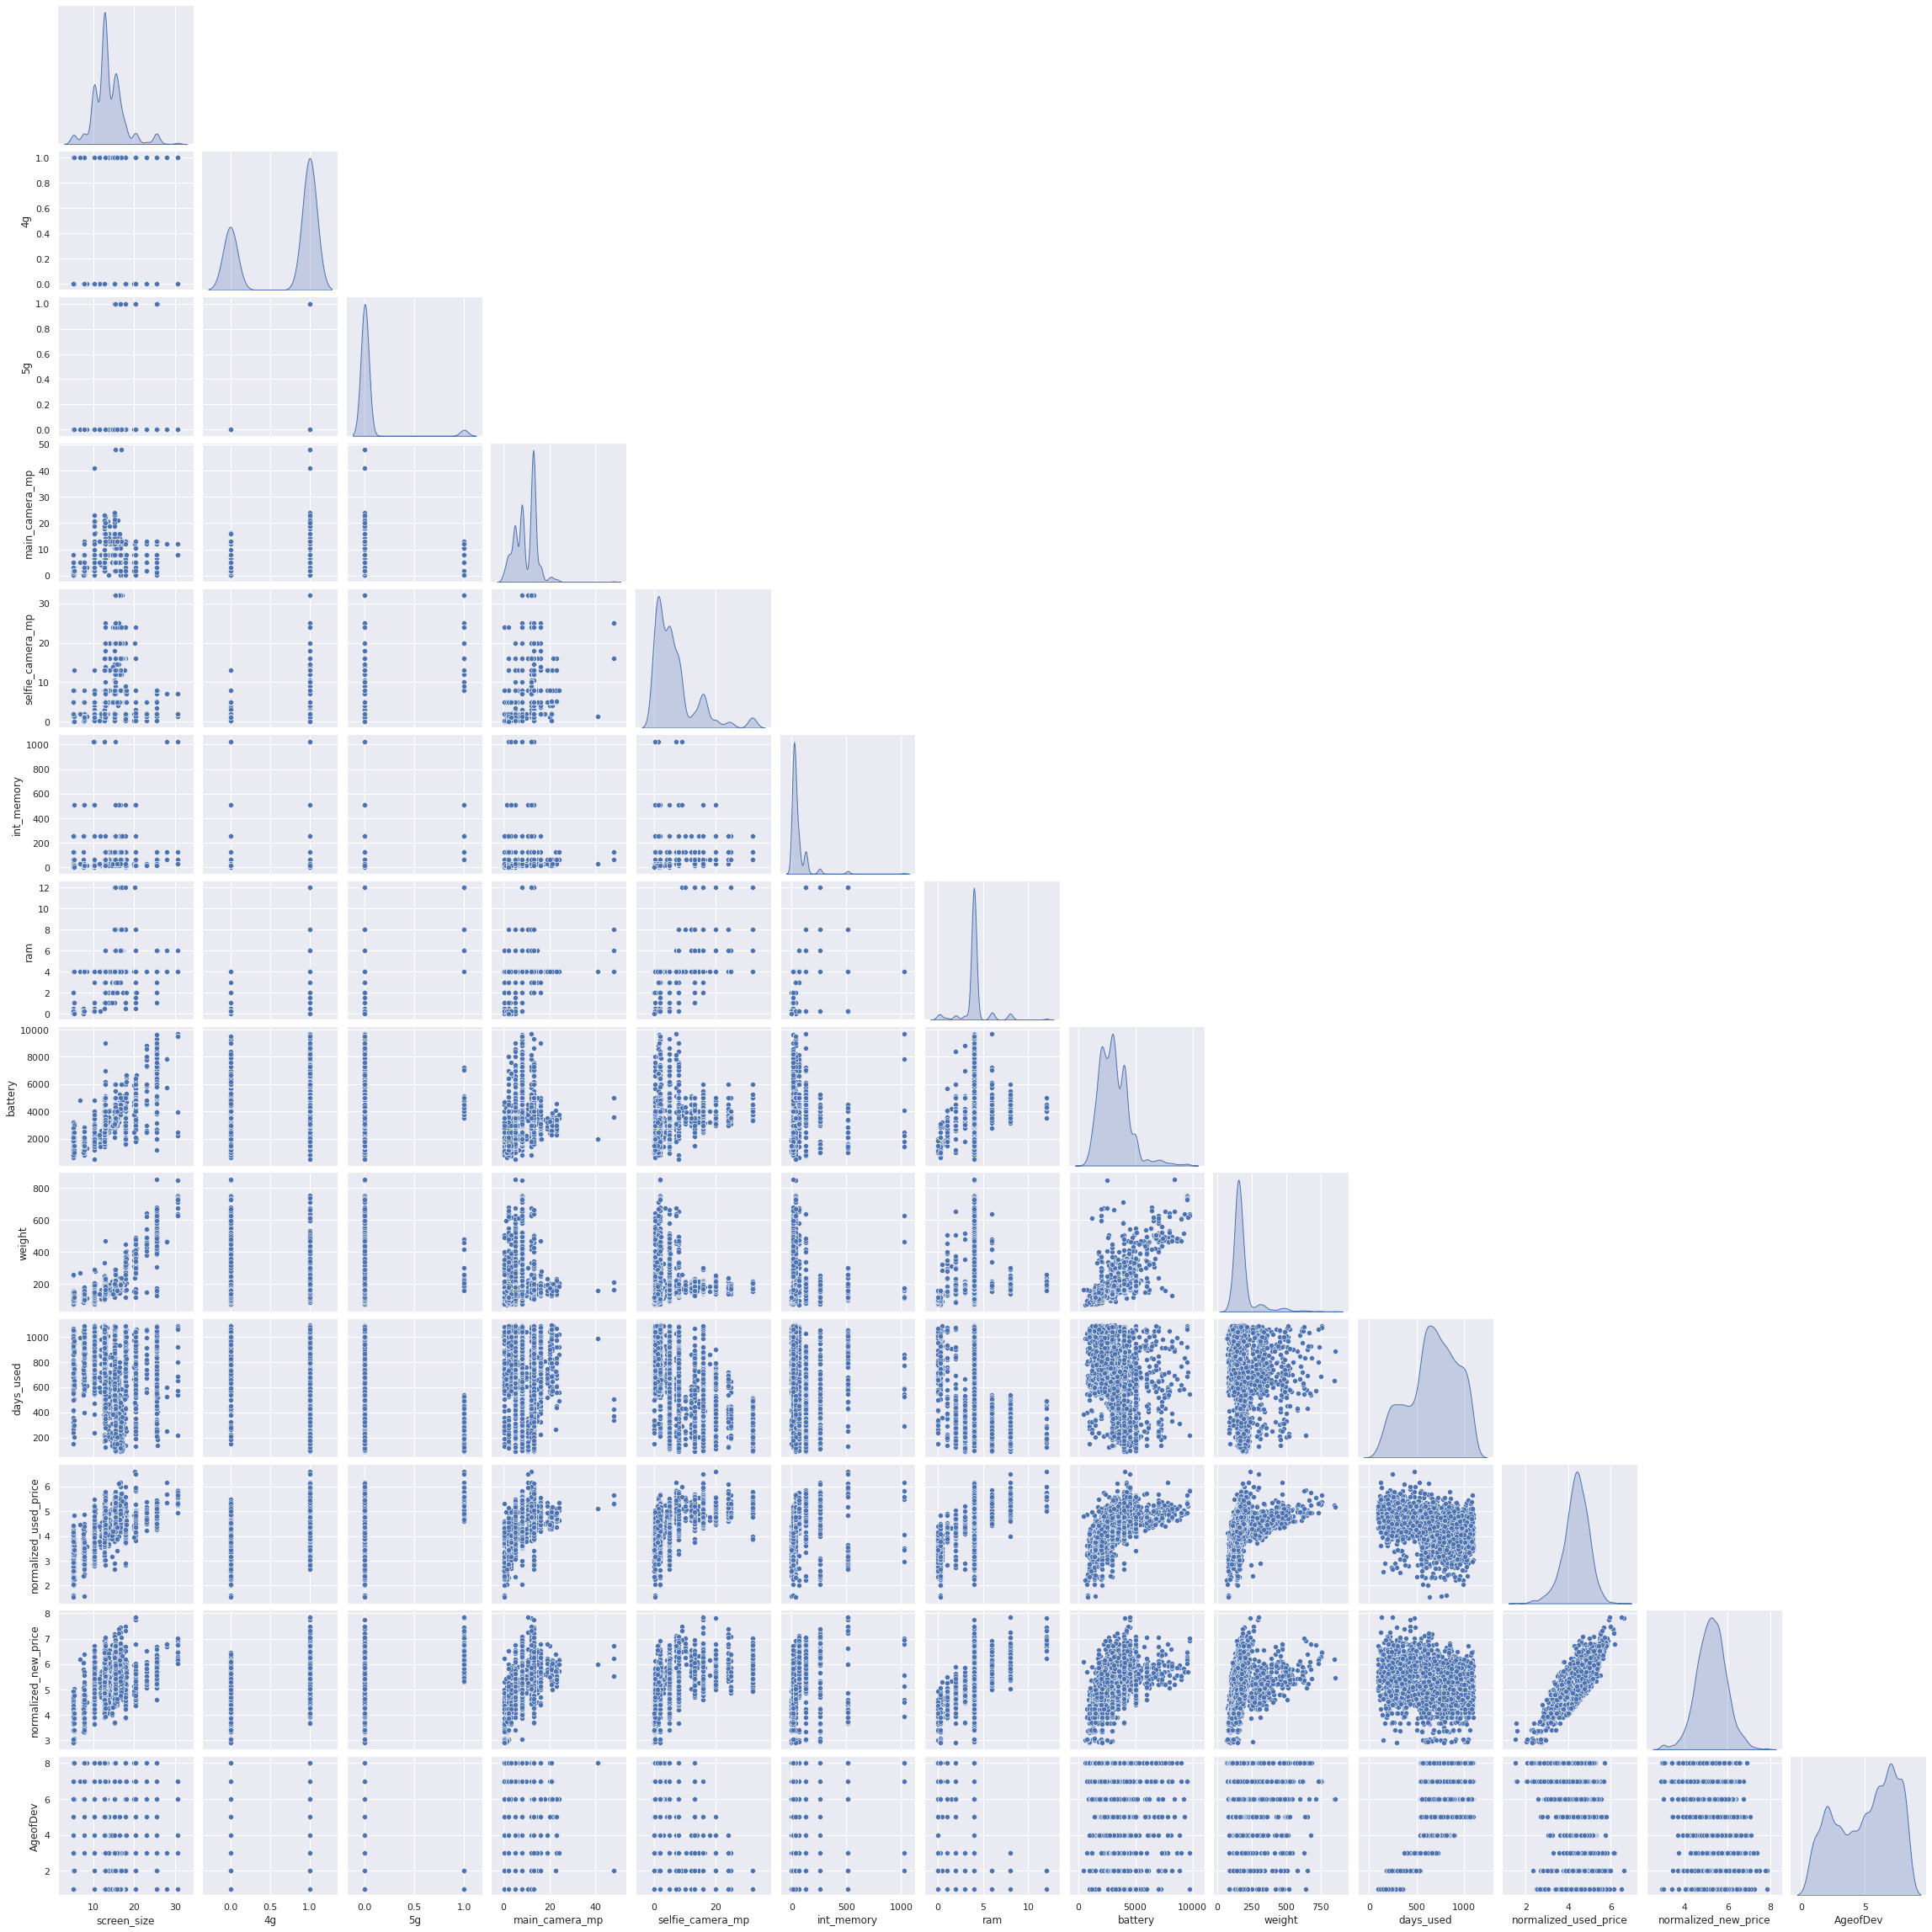

In [ ]:
#Let's take a look to all correlations plus our new columns
data_attr = data1.iloc[:, 0:15]
sns.pairplot(
    data_attr, diag_kind="kde", corner = True
)

*   There is no evident correlation between the normalized used price and how many years have passed since the device's release.





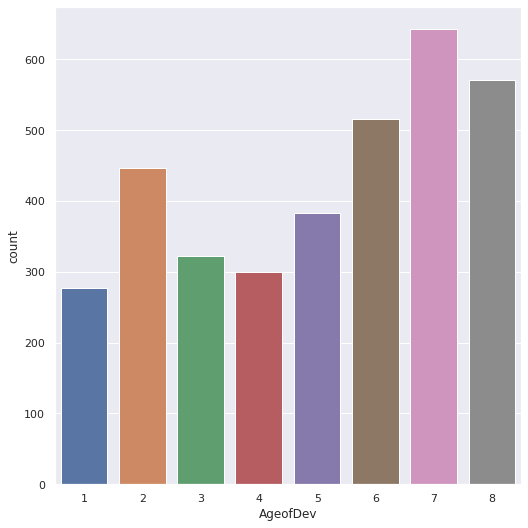

In [ ]:
#Plotting new variable
sns.countplot(data=data1,x='AgeofDev')
plt.show()

*   This plot mirrors our dropped column release year.




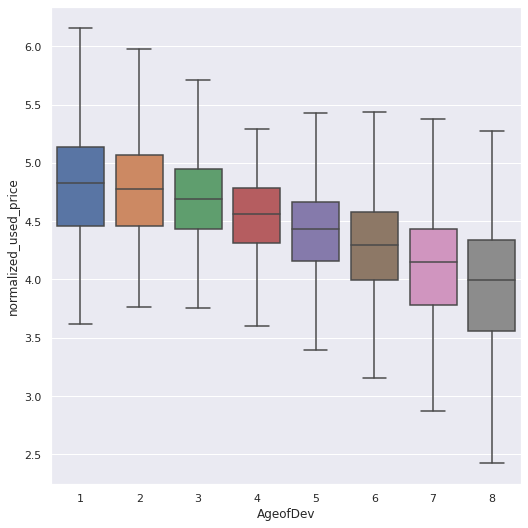

In [ ]:
sns.boxplot(data=data1,x='AgeofDev',y='normalized_used_price',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
plt.show()

*   The broader range of prices are in devices in the extremes: 1 and 8 years old.



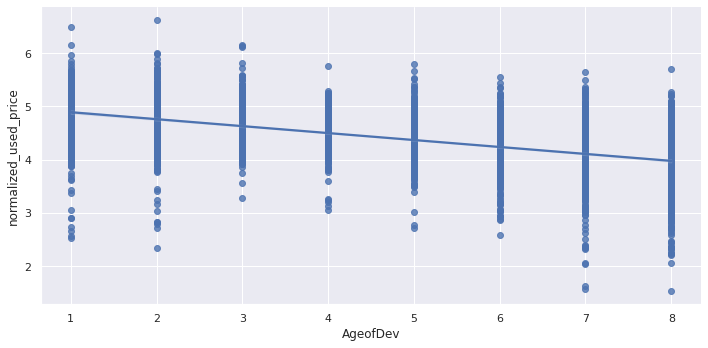

In [ ]:
sns.lmplot(data=data1,x='AgeofDev',y='normalized_used_price',height=5,aspect=2)
plt.show()

*   We can see a decrease in normalized used price when the devices are older. 


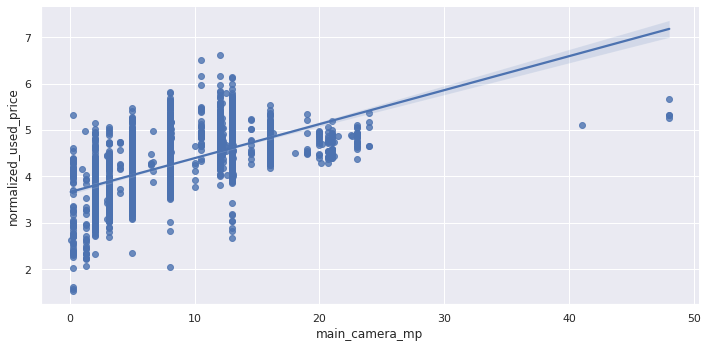

In [ ]:
sns.lmplot(data=data1,x='main_camera_mp',y='normalized_used_price',height=5,aspect=2)
plt.show()

*   Our main camera MP variable did not change visibly after imputation.






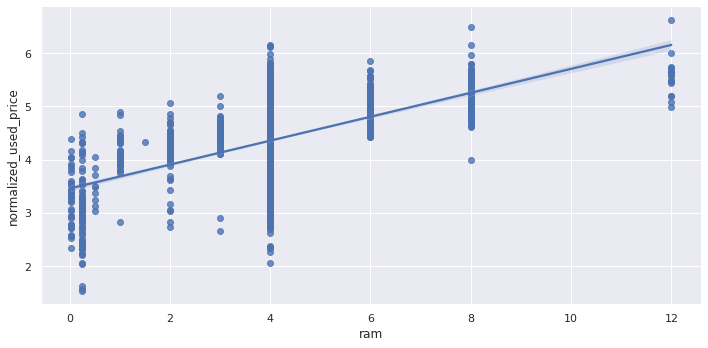

In [ ]:
sns.lmplot(data=data1,x='ram',y='normalized_used_price',height=5,aspect=2)
plt.show()

*   Our RAM variable did not change visibly after imputation.

## Model Building - Linear Regression

In [ ]:
#Making a copy of treated data as df for safety sake
df = data1.copy()

In [ ]:
# generating dummies variables from brand name column and dropping the first one
df = pd.get_dummies(df, columns=['brand_name'], drop_first=True)
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,...,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE
0,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,...,0,0,0,0,0,0,0,0,0,0
1,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,...,0,0,0,0,0,0,0,0,0,0
2,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,...,0,0,0,0,0,0,0,0,0,0
3,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,...,0,0,0,0,0,0,0,0,0,0
4,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking the columns in df
df.columns

Index(['os', 'screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'AgeofDev',
       'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
       'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix',
       'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
       'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
       'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
       'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
       'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
       'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE'],
      dtype='object')

In [ ]:
#Checking the original list of brand names
print(np.unique(data1['brand_name']))

['Acer' 'Alcatel' 'Apple' 'Asus' 'BlackBerry' 'Celkon' 'Coolpad' 'Gionee'
 'Google' 'HTC' 'Honor' 'Huawei' 'Infinix' 'Karbonn' 'LG' 'Lava' 'Lenovo'
 'Meizu' 'Micromax' 'Microsoft' 'Motorola' 'Nokia' 'OnePlus' 'Oppo'
 'Others' 'Panasonic' 'Realme' 'Samsung' 'Sony' 'Spice' 'Vivo' 'XOLO'
 'Xiaomi' 'ZTE']


In [ ]:
# generating dummies variables from os column and dropping the first one
df = pd.get_dummies(df, columns=['os'], drop_first=True)
df.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,...,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,127,...,0,0,0,0,0,0,0,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,325,...,0,0,0,0,0,0,0,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,162,...,0,0,0,0,0,0,0,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,345,...,0,0,0,0,0,0,0,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,293,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data

In [ ]:
# independent variables
X = df.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df[["normalized_used_price"]]

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Splitting dependent and independent variables in train and test groups

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.head())

      const  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
3026    1.0        10.29   0   0             8.0               0.3   
1525    1.0        15.34   1   0            13.0               5.0   
1128    1.0        12.70   0   0            13.0               5.0   
3003    1.0        12.83   1   0             8.0               5.0   
2907    1.0        12.88   1   0            13.0              16.0   

      int_memory  ram  battery  weight  ...  brand_name_Samsung  \
3026        16.0  4.0   1800.0   120.0  ...                   0   
1525        32.0  4.0   4050.0   225.0  ...                   0   
1128        32.0  4.0   2550.0   162.0  ...                   0   
3003        16.0  4.0   3200.0   126.0  ...                   0   
2907        16.0  4.0   2900.0   160.0  ...                   0   

      brand_name_Sony  brand_name_Spice  brand_name_Vivo  brand_name_XOLO  \
3026                0                 0                0                1   
1525                0 

In [ ]:
print(X_test.head())

      const  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
866     1.0        15.24   0   0            8.00               2.0   
957     1.0        10.16   0   0            3.15               0.3   
280     1.0        15.39   1   0            8.00               8.0   
2150    1.0        12.83   1   0           13.00              16.0   
93      1.0        15.29   1   0           13.00               5.0   

      int_memory   ram  battery  weight  ...  brand_name_Samsung  \
866         16.0  4.00   3000.0   206.0  ...                   0   
957        512.0  0.25   1400.0   140.0  ...                   0   
280         32.0  2.00   5000.0   185.0  ...                   0   
2150        64.0  4.00   3200.0   148.0  ...                   0   
93          32.0  3.00   3500.0   179.0  ...                   0   

      brand_name_Sony  brand_name_Spice  brand_name_Vivo  brand_name_XOLO  \
866                 0                 0                0                0   
957             

## Fit linear model

In [ ]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:02   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### R-square interpretation

* The R-squared value tells us that our model can explain 84.2% of the variance in the training set.

### Checking for multicollinearity

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    227.744081
screen_size                7.677290
4g                         2.467681
5g                         1.813900
main_camera_mp             2.285051
selfie_camera_mp           2.812473
int_memory                 1.364152
ram                        2.282352
battery                    4.081780
weight                     6.396749
days_used                  2.660269
normalized_new_price       3.119430
AgeofDev                   4.899007
brand_name_Alcatel         3.405693
brand_name_Apple          13.057668
brand_name_Asus            3.332038
brand_name_BlackBerry      1.632378
brand_name_Celkon          1.774721
brand_name_Coolpad         1.468006
brand_name_Gionee          1.951272
brand_name_Google          1.321778
brand_name_HTC             3.410361
brand_name_Honor           3.340687
brand_name_Huawei          5.983852
brand_name_Infinix         1.283955
brand_name_Karbonn         1.573702
brand_name_LG              4.849832
brand_name_Lav

* The VIF values greater than 5 indicate that the features screen size, weight, brand name Apple, brand name Huawei, others brand names, and iOS are correlated with one or more independent features.

* Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of the rest of the variables.

* To treat multicollinearity, we will have to drop one or more of the correlated features.

* We will drop the variable that has the least impact on the adjusted R-squared of the model.

### Removing multicollinear variables one by one

In [ ]:
#Dropping screen_size
X_train2 = X_train.drop(["screen_size"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


In [ ]:
#Dropping weight
X_train3 = X_train.drop(["weight"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.841 
Adjusted R-squared: 0.838


In [ ]:
#Dropping brand_name_Apple
X_train4 = X_train.drop(["brand_name_Apple"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


In [ ]:
#Dropping brand_name_Huawei
X_train5 = X_train.drop(["brand_name_Huawei"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


In [ ]:
#Dropping brand_name_Others
X_train6 = X_train.drop(["brand_name_Others"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


In [ ]:
#Dropping os_iOS
X_train7 = X_train.drop(["os_iOS"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


*   There's no effect in dropping Apple, Wuawei, Others brand names, and iOS. 
*   Let's drop them one by one and check again.





### Dropping Apple

In [ ]:
X_train = X_train.drop(["brand_name_Apple"], axis=1)

In [ ]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:03   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2369   BIC:                             126.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Rechecking for multicollinearity
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    227.303871
screen_size                7.643583
4g                         2.466689
5g                         1.805259
main_camera_mp             2.284429
selfie_camera_mp           2.791121
int_memory                 1.364138
ram                        2.273686
battery                    4.079720
weight                     6.394014
days_used                  2.659799
normalized_new_price       3.102417
AgeofDev                   4.890322
brand_name_Alcatel         3.230773
brand_name_Asus            3.145077
brand_name_BlackBerry      1.561121
brand_name_Celkon          1.731854
brand_name_Coolpad         1.436852
brand_name_Gionee          1.886381
brand_name_Google          1.293163
brand_name_HTC             3.240658
brand_name_Honor           3.160024
brand_name_Huawei          5.581714
brand_name_Infinix         1.265587
brand_name_Karbonn         1.544264
brand_name_LG              4.565534
brand_name_Lava            1.670810
brand_name_Len

*   Dropping Apple had little effect, except on os_iOS variable. 


In [ ]:
#Dropping brand_name_Huawei
X_train8 = X_train.drop(["brand_name_Huawei"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train8)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


In [ ]:
#Dropping brand_name_Others
X_train9 = X_train.drop(["brand_name_Others"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train9)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


### Dropping Others

In [ ]:
X_train = X_train.drop(["brand_name_Others"], axis=1)

In [ ]:
olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.6
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:04   Log-Likelihood:                 123.83
No. Observations:                   2417   AIC:                            -153.7
Df Residuals:                       2370   BIC:                             118.5
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Rechecking for multicollinearity
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    150.393434
screen_size                7.570160
4g                         2.461660
5g                         1.804261
main_camera_mp             2.282967
selfie_camera_mp           2.789316
int_memory                 1.363494
ram                        2.270179
battery                    4.079499
weight                     6.368105
days_used                  2.659536
normalized_new_price       3.101340
AgeofDev                   4.889801
brand_name_Alcatel         1.217774
brand_name_Asus            1.200106
brand_name_BlackBerry      1.124156
brand_name_Celkon          1.174460
brand_name_Coolpad         1.053584
brand_name_Gionee          1.090931
brand_name_Google          1.044521
brand_name_HTC             1.220975
brand_name_Honor           1.280970
brand_name_Huawei          1.500731
brand_name_Infinix         1.062175
brand_name_Karbonn         1.073820
brand_name_LG              1.344248
brand_name_Lava            1.071015
brand_name_Len

*   While dropping Others we eliminated the multicollinearity in Huawei. 
*   Multicollinearity is still present in screen_size and weight. Let's check the effect on dropping them again. 



In [ ]:
#Dropping screen_size
X_train10 = X_train.drop(["screen_size"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train10)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 6), #Let's see more decimals to better compare
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 6),
)

R-squared: 0.841459 
Adjusted R-squared: 0.83845


In [ ]:
#Dropping weight
X_train11 = X_train.drop(["weight"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train11)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 6), #Let's see more decimals to better compare
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 6),
)

R-squared: 0.841213 
Adjusted R-squared: 0.8382


*   There is a marginal stronger negative effect if we drop weight instead of screen_size.
*   Nevertheless the latest OLS regression results gives to screen_size a stronger coeficient. So let's keep it and drop weight. 


### Dropping Weight

In [ ]:
X_train = X_train.drop(["weight"], axis=1)

In [ ]:
olsmod_11 = sm.OLS(y_train, X_train)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.1
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:05   Log-Likelihood:                 95.572
No. Observations:                   2417   AIC:                            -99.14
Df Residuals:                       2371   BIC:                             167.2
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                    135.987622
screen_size                3.552666
4g                         2.442749
5g                         1.801754
main_camera_mp             2.187492
selfie_camera_mp           2.766447
int_memory                 1.363394
ram                        2.267669
battery                    3.679445
days_used                  2.647621
normalized_new_price       3.098708
AgeofDev                   4.716347
brand_name_Alcatel         1.209756
brand_name_Asus            1.199220
brand_name_BlackBerry      1.123273
brand_name_Celkon          1.173996
brand_name_Coolpad         1.052843
brand_name_Gionee          1.087502
brand_name_Google          1.044225
brand_name_HTC             1.219525
brand_name_Honor           1.266816
brand_name_Huawei          1.490181
brand_name_Infinix         1.057899
brand_name_Karbonn         1.071396
brand_name_LG              1.338694
brand_name_Lava            1.067391
brand_name_Lenovo          1.294162
brand_name_Mei

*   All our independent variables have a variance inflation factor under 5.
*   The variable for the device's age is close to 5, but let's move ahead.  



### Removing non-significant predictor variables

Let's begin dropping categorical variables with higher p-values.

In [ ]:
# Dropping brand_name_XOLO
X_train12 = X_train.drop(["brand_name_XOLO"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     285.6
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.568
No. Observations:                   2417   AIC:                            -101.1
Df Residuals:                       2372   BIC:                             159.4
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
# Dropping brand_name_ZTE
X_train13 = X_train12.drop(["brand_name_ZTE"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     292.4
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.542
No. Observations:                   2417   AIC:                            -103.1
Df Residuals:                       2373   BIC:                             151.7
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Oppo
X_train14 = X_train13.drop(["brand_name_Oppo"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     299.4
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.516
No. Observations:                   2417   AIC:                            -105.0
Df Residuals:                       2374   BIC:                             144.0
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Spice
X_train15 = X_train14.drop(["brand_name_Spice"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     306.9
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.506
No. Observations:                   2417   AIC:                            -107.0
Df Residuals:                       2375   BIC:                             136.2
Df Model:                             41                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Coolpad
X_train16 = X_train15.drop(["brand_name_Coolpad"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     314.7
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.468
No. Observations:                   2417   AIC:                            -108.9
Df Residuals:                       2376   BIC:                             128.5
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Alcatel
X_train17 = X_train16.drop(["brand_name_Alcatel"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(olsres_17.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     322.9
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.446
No. Observations:                   2417   AIC:                            -110.9
Df Residuals:                       2377   BIC:                             120.7
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Motorola
X_train18 = X_train17.drop(["brand_name_Motorola"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(olsres_18.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     331.5
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.427
No. Observations:                   2417   AIC:                            -112.9
Df Residuals:                       2378   BIC:                             113.0
Df Model:                             38                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Huawei
X_train19 = X_train18.drop(["brand_name_Huawei"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(olsres_19.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     340.6
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.332
No. Observations:                   2417   AIC:                            -114.7
Df Residuals:                       2379   BIC:                             105.4
Df Model:                             37                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Meizu
X_train20 = X_train19.drop(["brand_name_Meizu"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(olsres_20.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     350.1
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.272
No. Observations:                   2417   AIC:                            -116.5
Df Residuals:                       2380   BIC:                             97.70
Df Model:                             36                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Lava
X_train21 = X_train20.drop(["brand_name_Lava"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(olsres_21.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     360.3
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.180
No. Observations:                   2417   AIC:                            -118.4
Df Residuals:                       2381   BIC:                             90.09
Df Model:                             35                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_Google
X_train22 = X_train21.drop(["brand_name_Google"], axis=1)
olsmod_22 = sm.OLS(y_train, X_train22)
olsres_22 = olsmod_22.fit()
print(olsres_22.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     371.0
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.087
No. Observations:                   2417   AIC:                            -120.2
Df Residuals:                       2382   BIC:                             82.49
Df Model:                             34                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_HTC
X_train23 = X_train22.drop(["brand_name_HTC"], axis=1)
olsmod_23 = sm.OLS(y_train, X_train23)
olsres_23 = olsmod_23.fit()
print(olsres_23.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     382.3
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 95.007
No. Observations:                   2417   AIC:                            -122.0
Df Residuals:                       2383   BIC:                             74.86
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping brand_name_BlackBerry
X_train24 = X_train23.drop(["brand_name_BlackBerry"], axis=1)
olsmod_24 = sm.OLS(y_train, X_train24)
olsres_24 = olsmod_24.fit()
print(olsres_24.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     394.4
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 94.858
No. Observations:                   2417   AIC:                            -123.7
Df Residuals:                       2384   BIC:                             67.36
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_LG
X_train25 = X_train24.drop(["brand_name_LG"], axis=1)
olsmod_25 = sm.OLS(y_train, X_train25)
olsres_25 = olsmod_25.fit()
print(olsres_25.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     407.2
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 94.656
No. Observations:                   2417   AIC:                            -125.3
Df Residuals:                       2385   BIC:                             59.98
Df Model:                             31                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Realme
X_train26 = X_train25.drop(["brand_name_Realme"], axis=1)
olsmod_26 = sm.OLS(y_train, X_train26)
olsres_26 = olsmod_26.fit()
print(olsres_26.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     420.9
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:06   Log-Likelihood:                 94.444
No. Observations:                   2417   AIC:                            -126.9
Df Residuals:                       2386   BIC:                             52.61
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Honor
X_train27 = X_train26.drop(["brand_name_Honor"], axis=1)
olsmod_27 = sm.OLS(y_train, X_train27)
olsres_27 = olsmod_27.fit()
print(olsres_27.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     435.5
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 94.221
No. Observations:                   2417   AIC:                            -128.4
Df Residuals:                       2387   BIC:                             45.27
Df Model:                             29                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping os_Others
X_train28 = X_train27.drop(["os_Others"], axis=1)
olsmod_28 = sm.OLS(y_train, X_train28)
olsres_28 = olsmod_28.fit()
print(olsres_28.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     451.2
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 94.212
No. Observations:                   2417   AIC:                            -130.4
Df Residuals:                       2388   BIC:                             37.49
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping os_Windows
X_train29 = X_train28.drop(["os_Windows"], axis=1)
olsmod_29 = sm.OLS(y_train, X_train29)
olsres_29 = olsmod_29.fit()
print(olsres_29.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     468.1
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 94.109
No. Observations:                   2417   AIC:                            -132.2
Df Residuals:                       2389   BIC:                             29.91
Df Model:                             27                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Asus
X_train30 = X_train29.drop(["brand_name_Asus"], axis=1)
olsmod_30 = sm.OLS(y_train, X_train30)
olsres_30 = olsmod_30.fit()
print(olsres_30.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     486.1
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 93.811
No. Observations:                   2417   AIC:                            -133.6
Df Residuals:                       2390   BIC:                             22.71
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping battery
X_train31 = X_train30.drop(["battery"], axis=1)
olsmod_31 = sm.OLS(y_train, X_train31)
olsres_31 = olsmod_31.fit()
print(olsres_31.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     505.8
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 93.810
No. Observations:                   2417   AIC:                            -135.6
Df Residuals:                       2391   BIC:                             14.93
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping os_iOS
X_train32 = X_train31.drop(["os_iOS"], axis=1)
olsmod_32 = sm.OLS(y_train, X_train32)
olsres_32 = olsmod_32.fit()
print(olsres_32.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     526.9
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 93.471
No. Observations:                   2417   AIC:                            -136.9
Df Residuals:                       2392   BIC:                             7.814
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_OnePlus
X_train33 = X_train32.drop(["brand_name_OnePlus"], axis=1)
olsmod_33 = sm.OLS(y_train, X_train33)
olsres_33 = olsmod_33.fit()
print(olsres_33.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     549.8
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 93.081
No. Observations:                   2417   AIC:                            -138.2
Df Residuals:                       2393   BIC:                            0.8055
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Celkon
X_train34 = X_train33.drop(["brand_name_Celkon"], axis=1)
olsmod_34 = sm.OLS(y_train, X_train34)
olsres_34 = olsmod_34.fit()
print(olsres_34.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     574.9
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 92.686
No. Observations:                   2417   AIC:                            -139.4
Df Residuals:                       2394   BIC:                            -6.195
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Gionee
X_train35 = X_train34.drop(["brand_name_Gionee"], axis=1)
olsmod_35 = sm.OLS(y_train, X_train35)
olsres_35 = olsmod_35.fit()
print(olsres_35.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     602.2
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 92.274
No. Observations:                   2417   AIC:                            -140.5
Df Residuals:                       2395   BIC:                            -13.16
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Vivo
X_train36 = X_train35.drop(["brand_name_Vivo"], axis=1)
olsmod_36 = sm.OLS(y_train, X_train36)
olsres_36 = olsmod_36.fit()
print(olsres_36.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     632.3
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 91.722
No. Observations:                   2417   AIC:                            -141.4
Df Residuals:                       2396   BIC:                            -19.85
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Panasonic
X_train37 = X_train36.drop(["brand_name_Panasonic"], axis=1)
olsmod_37 = sm.OLS(y_train, X_train37)
olsres_37 = olsmod_37.fit()
print(olsres_37.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     665.3
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 90.928
No. Observations:                   2417   AIC:                            -141.9
Df Residuals:                       2397   BIC:                            -26.05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Micromax
X_train38 = X_train37.drop(["brand_name_Micromax"], axis=1)
olsmod_38 = sm.OLS(y_train, X_train38)
olsres_38 = olsmod_38.fit()
print(olsres_38.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     701.8
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 89.846
No. Observations:                   2417   AIC:                            -141.7
Df Residuals:                       2398   BIC:                            -31.68
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Karbonn
X_train39 = X_train38.drop(["brand_name_Karbonn"], axis=1)
olsmod_39 = sm.OLS(y_train, X_train39)
olsres_39 = olsmod_39.fit()
print(olsres_39.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     742.5
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 88.571
No. Observations:                   2417   AIC:                            -141.1
Df Residuals:                       2399   BIC:                            -36.92
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Microsoft
X_train40 = X_train39.drop(["brand_name_Microsoft"], axis=1)
olsmod_40 = sm.OLS(y_train, X_train40)
olsres_40 = olsmod_40.fit()
print(olsres_40.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     788.5
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 87.613
No. Observations:                   2417   AIC:                            -141.2
Df Residuals:                       2400   BIC:                            -42.79
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping int_memory
X_train41 = X_train40.drop(["int_memory"], axis=1)
olsmod_41 = sm.OLS(y_train, X_train41)
olsres_41 = olsmod_41.fit()
print(olsres_41.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     840.5
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 86.538
No. Observations:                   2417   AIC:                            -141.1
Df Residuals:                       2401   BIC:                            -48.43
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Infinix
X_train42 = X_train41.drop(["brand_name_Infinix"], axis=1)
olsmod_42 = sm.OLS(y_train, X_train42)
olsres_42 = olsmod_42.fit()
print(olsres_42.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     899.8
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 85.334
No. Observations:                   2417   AIC:                            -140.7
Df Residuals:                       2402   BIC:                            -53.81
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping 5g
X_train43 = X_train42.drop(["5g"], axis=1)
olsmod_43 = sm.OLS(y_train, X_train43)
olsres_43 = olsmod_43.fit()
print(olsres_43.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     968.2
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:07   Log-Likelihood:                 84.074
No. Observations:                   2417   AIC:                            -140.1
Df Residuals:                       2403   BIC:                            -59.08
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Samsung
X_train44 = X_train43.drop(["brand_name_Samsung"], axis=1)
olsmod_44 = sm.OLS(y_train, X_train44)
olsres_44 = olsmod_44.fit()
print(olsres_44.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1048.
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:08   Log-Likelihood:                 82.486
No. Observations:                   2417   AIC:                            -139.0
Df Residuals:                       2404   BIC:                            -63.70
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Dropping brand_name_Sony
X_train45 = X_train44.drop(["brand_name_Sony"], axis=1)
olsmod_45 = sm.OLS(y_train, X_train45)
olsres_45 = olsmod_45.fit()
print(olsres_45.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:09:08   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

*   Finally: all p-values are under 0.05.
*   'olsres_45' is our model. 
*   All p-values are under 5%. We are ready to test if the model complies with linear regression assumptions. 

## Model Performance Check

In [ ]:
#Creating a new empty container dataframe
df_pred = pd.DataFrame()

#Filling the dataframe
df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_45.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_45.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.858599,0.228888
1,4.448399,4.613833,-0.165434
2,4.315353,4.277568,0.037785
3,4.282068,4.252225,0.029844
4,4.456438,4.440283,0.016156


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Test for linearity and independence

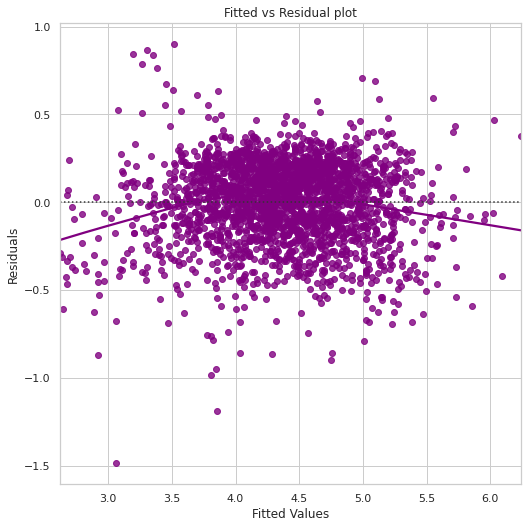

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

*   The residuals are pretty symmetrically distributed, tending to cluster towards the middle of the plot.
*   They are clustered around the lower single digits of the y-axis.
*   Let's see if we can improve the model performance with some column alteration.



In [ ]:
# columns in training set
X_train45.columns

Index(['const', 'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp',
       'ram', 'days_used', 'normalized_new_price', 'AgeofDev',
       'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi'],
      dtype='object')

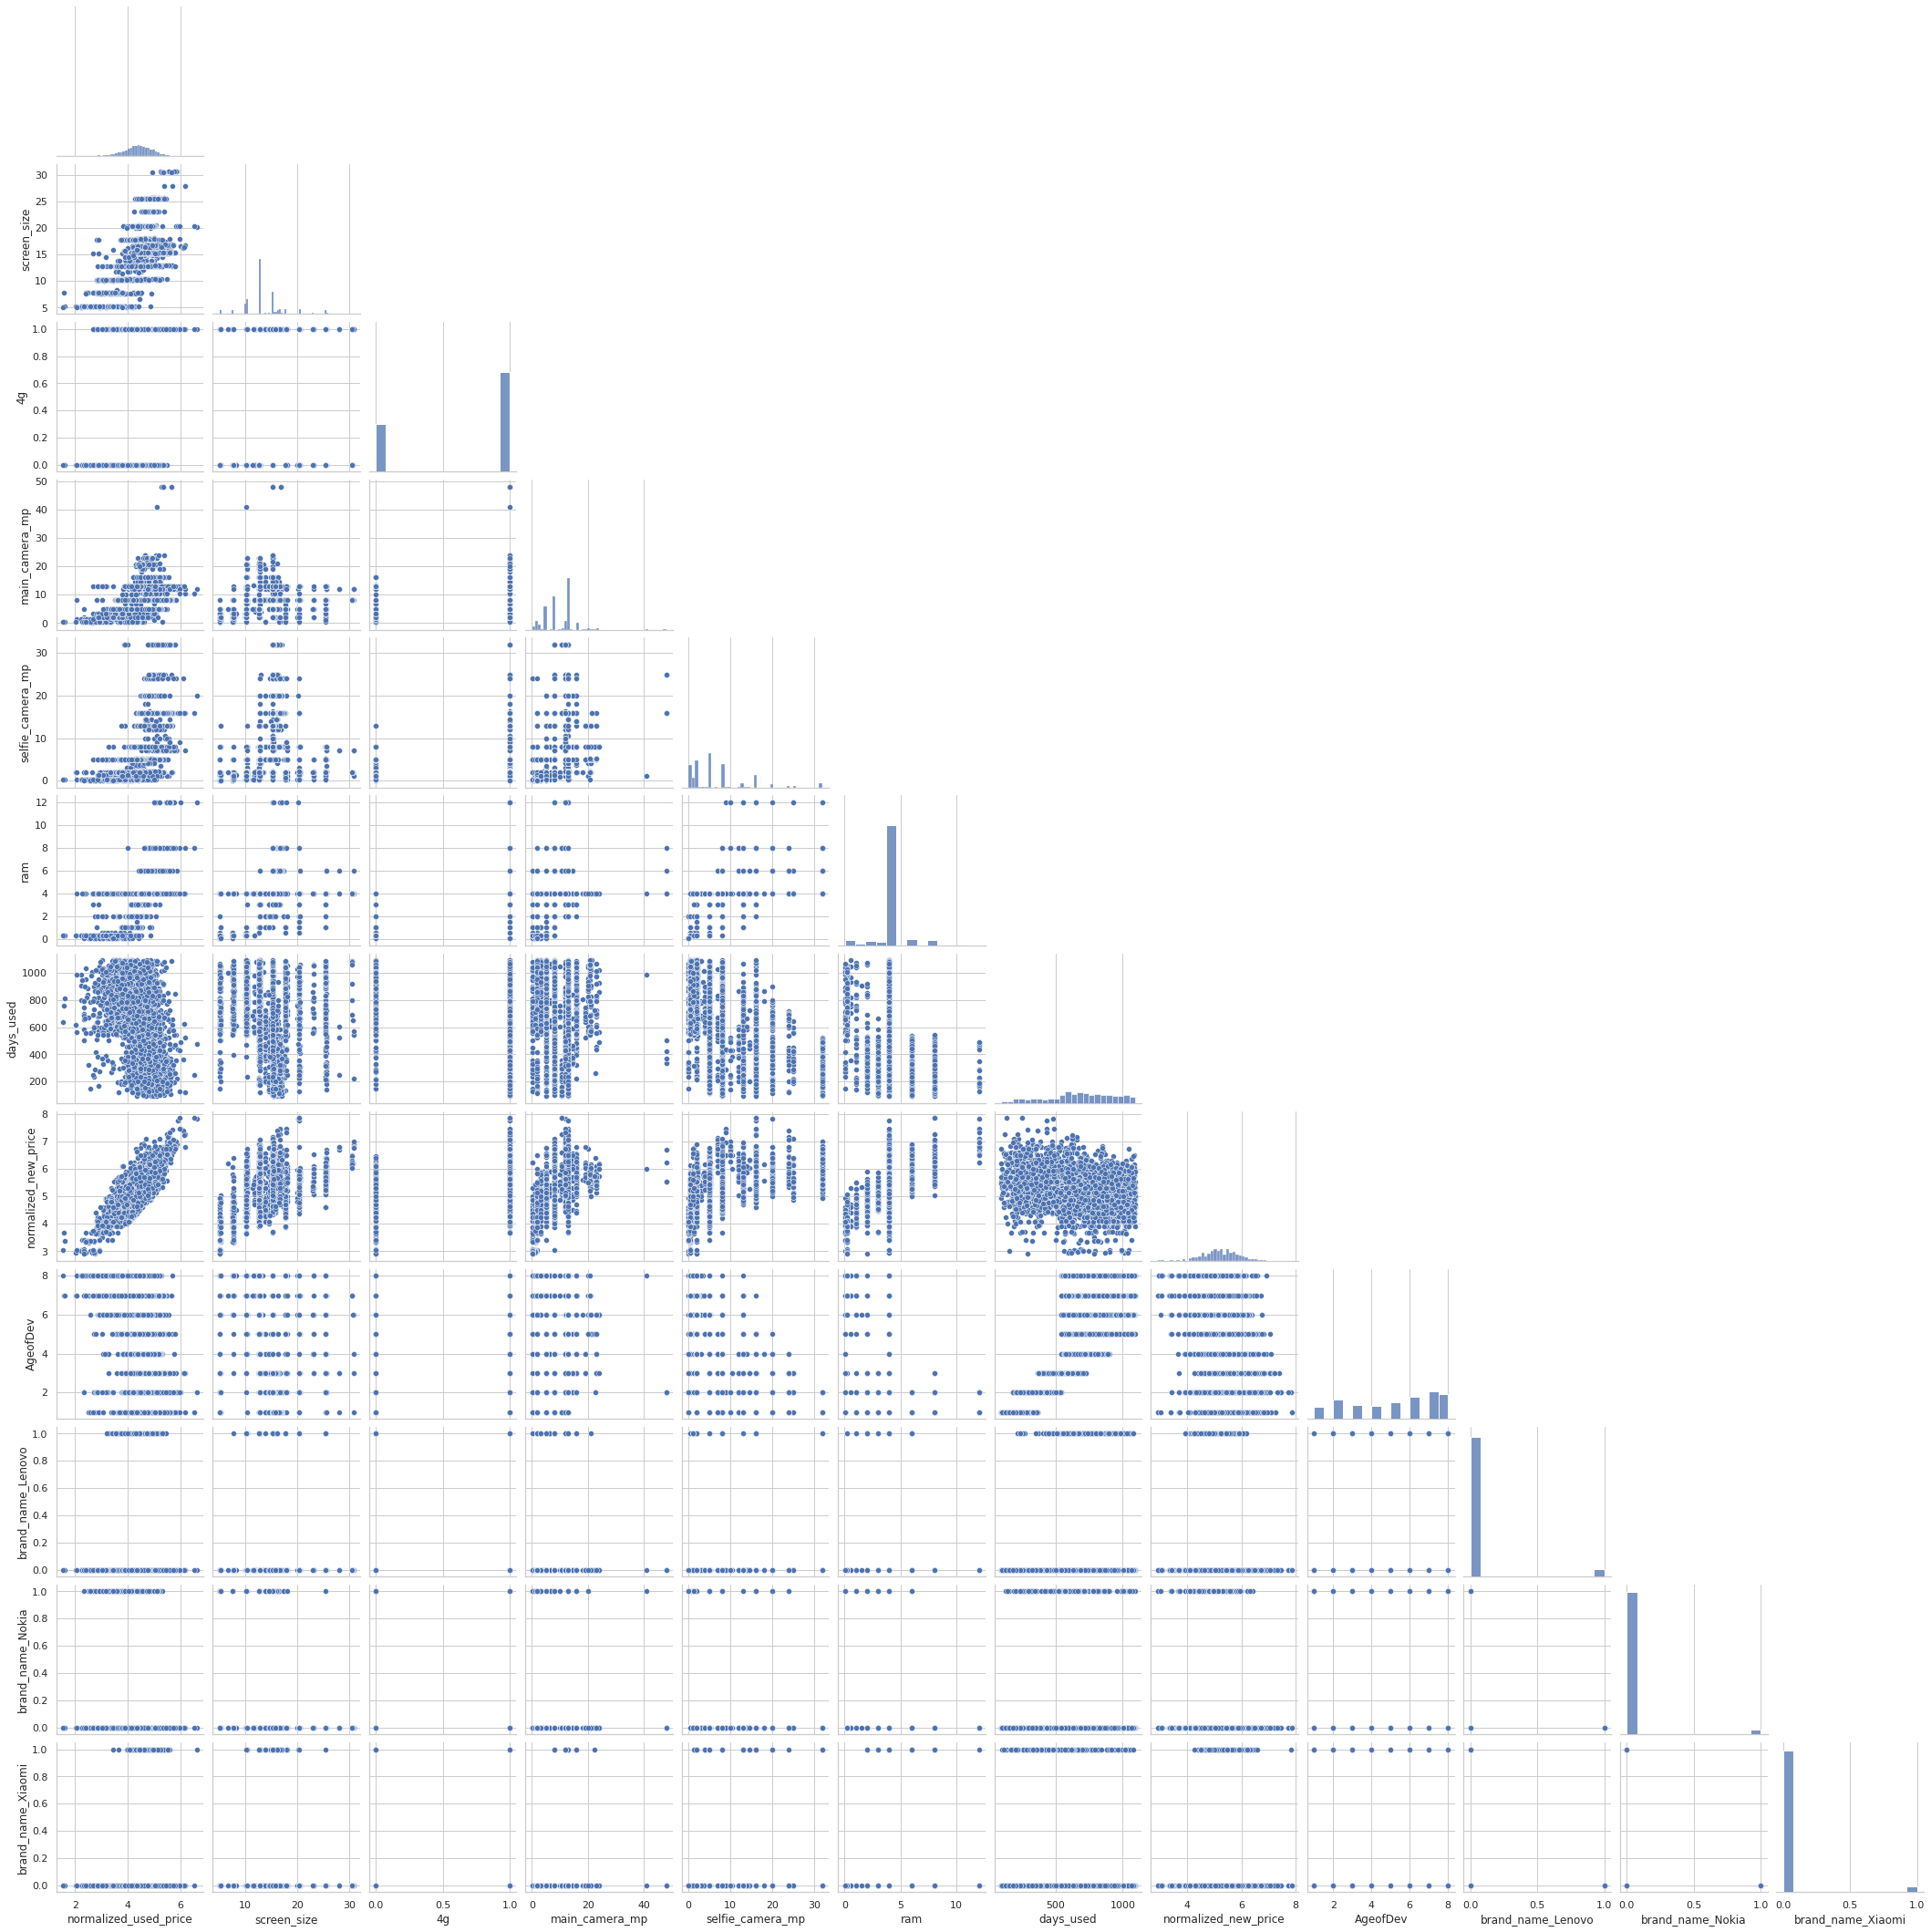

In [ ]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(df[['normalized_used_price', 'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp',
       'ram', 'days_used', 'normalized_new_price', 'AgeofDev',
       'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi']], corner = True)
plt.show()

*   We see days used could be showing a slightly non-linear relationship.
*   Let's square the variable to see if the model improves.



In [ ]:
# using square transformation
X_train45["days_used_sq"] = np.square(X_train45["days_used"])

# let's create a new model with the transformed data
olsmod_46 = sm.OLS(y_train, X_train45)
olsres_46 = olsmod_46.fit()
print(olsres_46.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1046.
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:10:11   Log-Likelihood:                 81.242
No. Observations:                   2417   AIC:                            -136.5
Df Residuals:                       2404   BIC:                            -61.21
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

*   The change did not affect the adjusted R-Squre, though elevated our P-values for days used and the new days used squared. 
*   We better stick to our original 'olsres_45' model. Let's drop the new squared variable from X_train45. 



In [ ]:
X_train45 = X_train45.drop(["days_used_sq"], axis=1)
X_train45.columns

Index(['const', 'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp',
       'ram', 'days_used', 'normalized_new_price', 'AgeofDev',
       'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi'],
      dtype='object')

### Test for normality

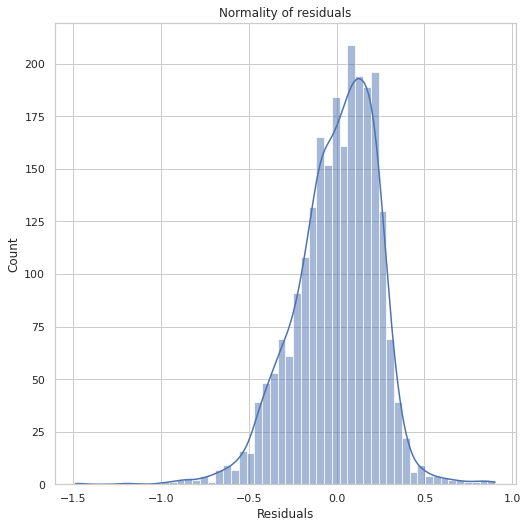

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

*   The residuals are normaly distributed though is a little left skewed. 

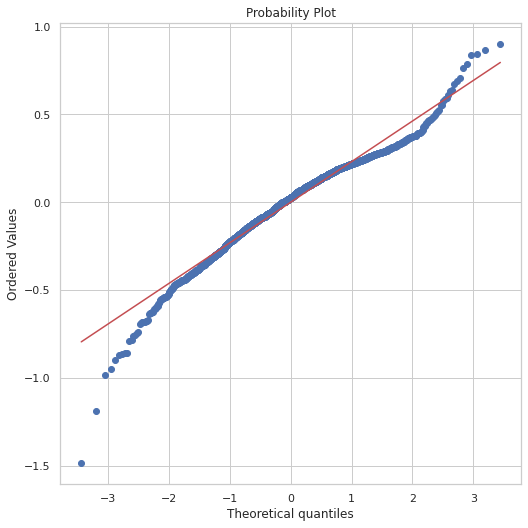

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

*   A good portion of the residuals go with the diagonal.
*   As expected, the left tail is a little off. 


In [ ]:
#Let's use the Shapiro-Wilk's Test for normality
stats.shapiro(df_pred["Residuals"])

(0.9724023342132568, 3.463951697107566e-21)

*   Strictly speaking, the Shapiro-Wilk's test said we should drop our alternate hypothesis: our residuals do not follow a normal distribution.
*   Nevertheless, we accept this is an aproximation. Even when the data does not form a perfect normal distribution, it is close. Let's give it as good. 



### Test for homoscedasticity

In [ ]:
#Let's use the Goldfeld-Quandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train45)
lzip(name, test)

[('F statistic', 1.0554902509992028), ('p-value', 0.17520491832996798)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

## Final Model

In [ ]:
print(olsres_45.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:10:12   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Observations

* R-squared and adjusted R-squared of the model is 0.839, which shows that the model can explain ~84% variance in the data. This percentage is very good.

* Normalized new price is the strongest predictor of normalized used price —each increase in normalized_new_price results in a 0.4282 increase in used device price, all other variables remaining constant.

* A unit increase in the model screen size will result in a 0.0433 unit increase in the used device price, with all other variables remaining constant.

* Having 4G availability will increase the used device price by 0.0369, all other variables remaining constant.

* Each megapixel increase in the main camera results in a 0.0189 increase in used device price; for the selfie camera is 0.0131, all other variables remain constant.

* Each increase in RAM units results in a 0.0172 increase in used device price, all other variables remaining constant.

* Each increase in days used units results in a 6.226e-05 addition in used device price, all other variables remaining constant.

* Each year a device has since its release, its used normalized price drops by 0.0181. 

* The price of a Lenovo device will be 0.0489 times higher than an Acer, with all other variables remaining constant. 

* The price of a Nokia device will be 0.0733 times higher than an Acer, with all other variables remaining constant.    

* The price of a Xiaomi device will be 0.0852 times higher than an Acer, with all other variables remaining constant.

### Printing the linear regression equation

In [ ]:
# let's check the model parameters
olsres_45.params

const                   1.211877
screen_size             0.043252
4g                      0.036881
main_camera_mp          0.018873
selfie_camera_mp        0.013121
ram                     0.017212
days_used               0.000062
normalized_new_price    0.428185
AgeofDev               -0.018109
brand_name_Lenovo       0.048897
brand_name_Nokia        0.073342
brand_name_Xiaomi       0.085171
dtype: float64

In [ ]:
# Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_train45.columns)):
    if i == 0:
        print(olsres_45.params[i], "+", end=" ")
    elif i != len(X_train45.columns) - 1:
        print(
            olsres_45.params[i],
            "* (",
            X_train45.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_45.params[i], "* (", X_train45.columns[i], ")")

normalized_used_price = 1.211877182446589 + 0.04325227839850707 * ( screen_size ) +  0.0368805182356972 * ( 4g ) +  0.018872701266751862 * ( main_camera_mp ) +  0.013121453066686719 * ( selfie_camera_mp ) +  0.01721186574246997 * ( ram ) +  6.226184812231322e-05 * ( days_used ) +  0.42818489618888644 * ( normalized_new_price ) +  -0.018109095903091142 * ( AgeofDev ) +  0.04889654269800854 * ( brand_name_Lenovo ) +  0.07334229761625298 * ( brand_name_Nokia ) +  0.08517107570967965 * ( brand_name_Xiaomi )


### Making predictions

In [ ]:
X_train45.columns

Index(['const', 'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp',
       'ram', 'days_used', 'normalized_new_price', 'AgeofDev',
       'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi'],
      dtype='object')

In [ ]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["5g", "int_memory", 'battery', 'weight', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn',
       'brand_name_LG', 'brand_name_Lava', 'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
       'brand_name_Motorola', 'brand_name_OnePlus',
       'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
       'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony',
       'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_ZTE', 'os_Others', 'os_Windows',
       'os_iOS'], axis=1)
X_test2.columns

Index(['const', 'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp',
       'ram', 'days_used', 'normalized_new_price', 'AgeofDev',
       'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi'],
      dtype='object')

In [ ]:
# let's make predictions on the test set
y_pred = olsres_45.predict(X_test2)

In [ ]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.23398918412830258

In [ ]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.1831774828664911

In [ ]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18499963617594217

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict mpg within a mean error of 0.1 units on the test data.
* Hence, we can conclude the model "ols_res45" is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations 

*   ReCell should focus its pricing strategy primarily on monitoring the selling price of new devices. According to our model, this is the variable that most affects the prices of used or refurbished models.

* Our regression model can help project ReCell's profits in coming years, based on the prices of the models entering the market this year.

* ReCell can take into account some secondary variables to predict an increase in prices: the size of the screen, the availability of 4G, its GB of RAM, and the megapixels of the devices' cameras.

* As expected, the older a model is, the more negatively it affects its price.

* We recommend not making price forecasts based on variables such as internal memory, 5G availability, weight, or battery capacity of the devices, as we have no evidence to support that these variables affect the price.

